# Introduction
This case study-assignment is based on Exploratory Data Analysis. The aim of this assignment is to apply EDA on real time business case. In this case study we will learn how to develop understanding of risk analytics in banking and financial services and as this dataset is applications of load by client, so by analyzing this data we understand how data is used to minimize the risk of losing money while approving the loan to applicants.


## Assignment Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios, Target: 1  and 0

* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

* **Approved:** The Company has approved loan Application

* **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

* **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

* **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

# Problem Statement
To take decision of loan application is very complicated task for any finance company, and it is big risk to approve loan without analysing applicant’s profile. It is hard to find insufficient or non-existent credit history of any applicant and due to this applicant may be take advantage of becoming defaulter. As a data analyst for finance company we have to apply EDA on given data to analyses the patterns present in that datasets. When the company receives a loan application, we must ensure that applicant capable to repaying loan amount without fault, and loan is approved after doing analysis of applicant’s profile. 
* There are 2 types of risks depend on decision of loan approval are as below:
  * 1] Rejecting the loan application to capable applicant leads to business loss.
  * 2] Accepting application of defaulter applicant, and if not able to replay loan leads to financial loss. 
 
* As task performing EDA on this problem statement we have to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this outcome before approving loan to any applicant.

# Data Understanding
This dataset has 3 files as explained below:

* 'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

* 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.
   
* 'columns_description.csv' is data dictionary which describes the meaning of the variables.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

#Data display seeting for rows and columns -
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading of Dataset 1 - Application Data CSV file

In [2]:
# Importing dataset, then reading and understanding given dataset
appl_df = pd.read_csv("application_data.csv")

In [3]:
appl_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# Checking rows and column -
appl_df.shape

(307511, 122)

In [5]:
# Checking information about all column and row data
appl_df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

As we see there are 307511 rows and 122 column with dtypes: float64(65), int64(41), object(16)

In [6]:
# Checking dtype, float and integer -
appl_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

Please not that Days columns having negative values as we, need to correct them, 
and for any high values we need to perform standardising of data.

# Below I am doing Data cleaning and Manipulation

In [7]:
# checking null values, we round values with ascending order for better and quick understanding.
round((100*appl_df.isnull().mean()).sort_values(ascending = False),2)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [8]:
## There are columns are having more that 50% missing values, first we will check that all columns as below -
cut_off=50
cols_to_drop=list(appl_df.columns[100*appl_df.isnull().mean()>cut_off])
print(cols_to_drop)
print("No. of columns to be dropped:",len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']
No. of columns to be dropped: 41


There are 41 columns which having more than 50% missing values are information about aera of appartments, of applicants, own/rented.
We dropping all these 41 columns.

In [9]:
appl_df.shape

(307511, 122)

In [10]:
appl_df=appl_df.drop(cols_to_drop,axis=1)

In [11]:
appl_df.shape

(307511, 81)

Now 81 columns are in dataset.

In [12]:
# checking again null values.
round((100*appl_df.isnull().mean()).sort_values(ascending = False),2)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
AMT_ANNUITY                      0.00
CNT_FAM_MEMBERS                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_OWN_CAR

There are 2 columns are important becase as per columns descrition data they are relevent to Target data, 
which are 'OCCUPATION_TYPE', 'EXT_SOURCE_3,so we will keep these column in dataset, now we drop columns more than 15%

In [13]:
cut_off=15
cols_to_drop_15=list(appl_df.columns[100*appl_df.isnull().mean()>cut_off])
print(cols_to_drop_15)
print("No. of columns to be dropped:",len(cols_to_drop_15))

['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']
No. of columns to be dropped: 10


In [14]:
cols_to_drop_15.remove('OCCUPATION_TYPE')
cols_to_drop_15.remove('EXT_SOURCE_3')

In [15]:
print("No. of columns to be dropped:",len(cols_to_drop_15))

No. of columns to be dropped: 8


In [16]:
# Now I am dropping above list
appl_df=appl_df.drop(cols_to_drop_15,axis=1)

In [17]:
appl_df.shape

(307511, 73)

Now there are 73 columns are remaining after dropping columns.

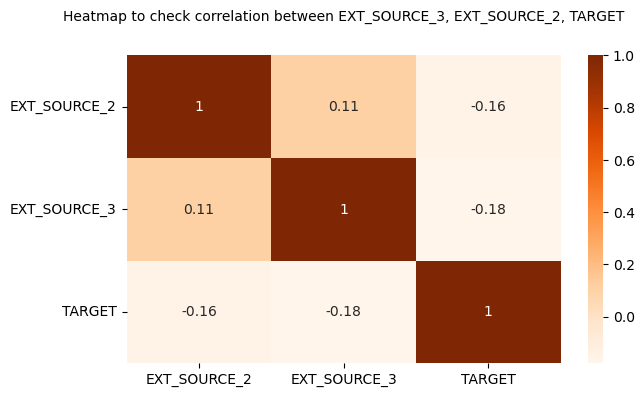

In [18]:
# Now we going to check the relation between 'EXT_SOURCE_2', 'EXT_SOURCE_3' and Target variable, for that we have to plot heatmap as below -
EXT_Source = ['EXT_SOURCE_2', 'EXT_SOURCE_3']
plt.figure(figsize= [7,4])
sns.heatmap(appl_df[EXT_Source + ["TARGET"]].corr(), cmap="Oranges",annot=True)
plt.title("Heatmap to check correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":10}, pad=25)
plt.show()

In [19]:
#After observation of this heatmap we see that, we not found any linera correlation, so er remove these 2 columns as below -
appl_df.drop(EXT_Source, axis=1, inplace= True)
appl_df.shape

(307511, 71)

In [20]:
# 71 columns are left

In [21]:
# checking again null values
round((100*appl_df.isnull().mean()).sort_values(ascending = False),2).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

Now we have to check FLAGS columns for any relation with TARGET

In [22]:
FLAGS_columns = [col for col in appl_df.columns if "FLAG" in col]
FLAGS_columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [23]:
#We adding target to this list
FLAGS_dataset = appl_df[FLAGS_columns+ ["TARGET"]]
FLAGS_dataset.shape

(307511, 29)

In [24]:
FLAGS_dataset["TARGET"] = FLAGS_dataset["TARGET"].replace({1:"Paydefault", 0:"Repay"})

In [25]:
#Replace 1 to Y and N to 0 as below
for i in FLAGS_dataset:
    if 1!="TARGET":
        FLAGS_dataset[i] = FLAGS_dataset[i].replace({1:"Y", 0:"N"})

In [26]:
FLAGS_dataset.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            N               Y          Y              Y               N   
1            N               N          Y              Y               N   
2            Y               Y          Y              Y               Y   
3            N               Y          Y              Y               N   
4            N               Y          Y              Y               N   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0                Y          Y          N               N               Y   
1                Y          Y          N               N               Y   
2                Y          Y          N               N               N   
3                Y          N          N               N               Y   
4                Y          N          N               N               N   

  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
0               N               N               N               N   
1               N               N               N               N   
2               N               N               N               N   
3               N               N               N               N   
4               N               N               N               N   

  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11  \
0               N               N                N                N   
1               N               N                N                N   
2               N               N                N                N   
3               N               N                N                N   
4               Y               N                N                N   

  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21      TARGET  
0                N                N  Paydefault  
1                N                N       Repay  
2                N                N       Repay  
3                N                N       Repay  
4                N                N       Repay

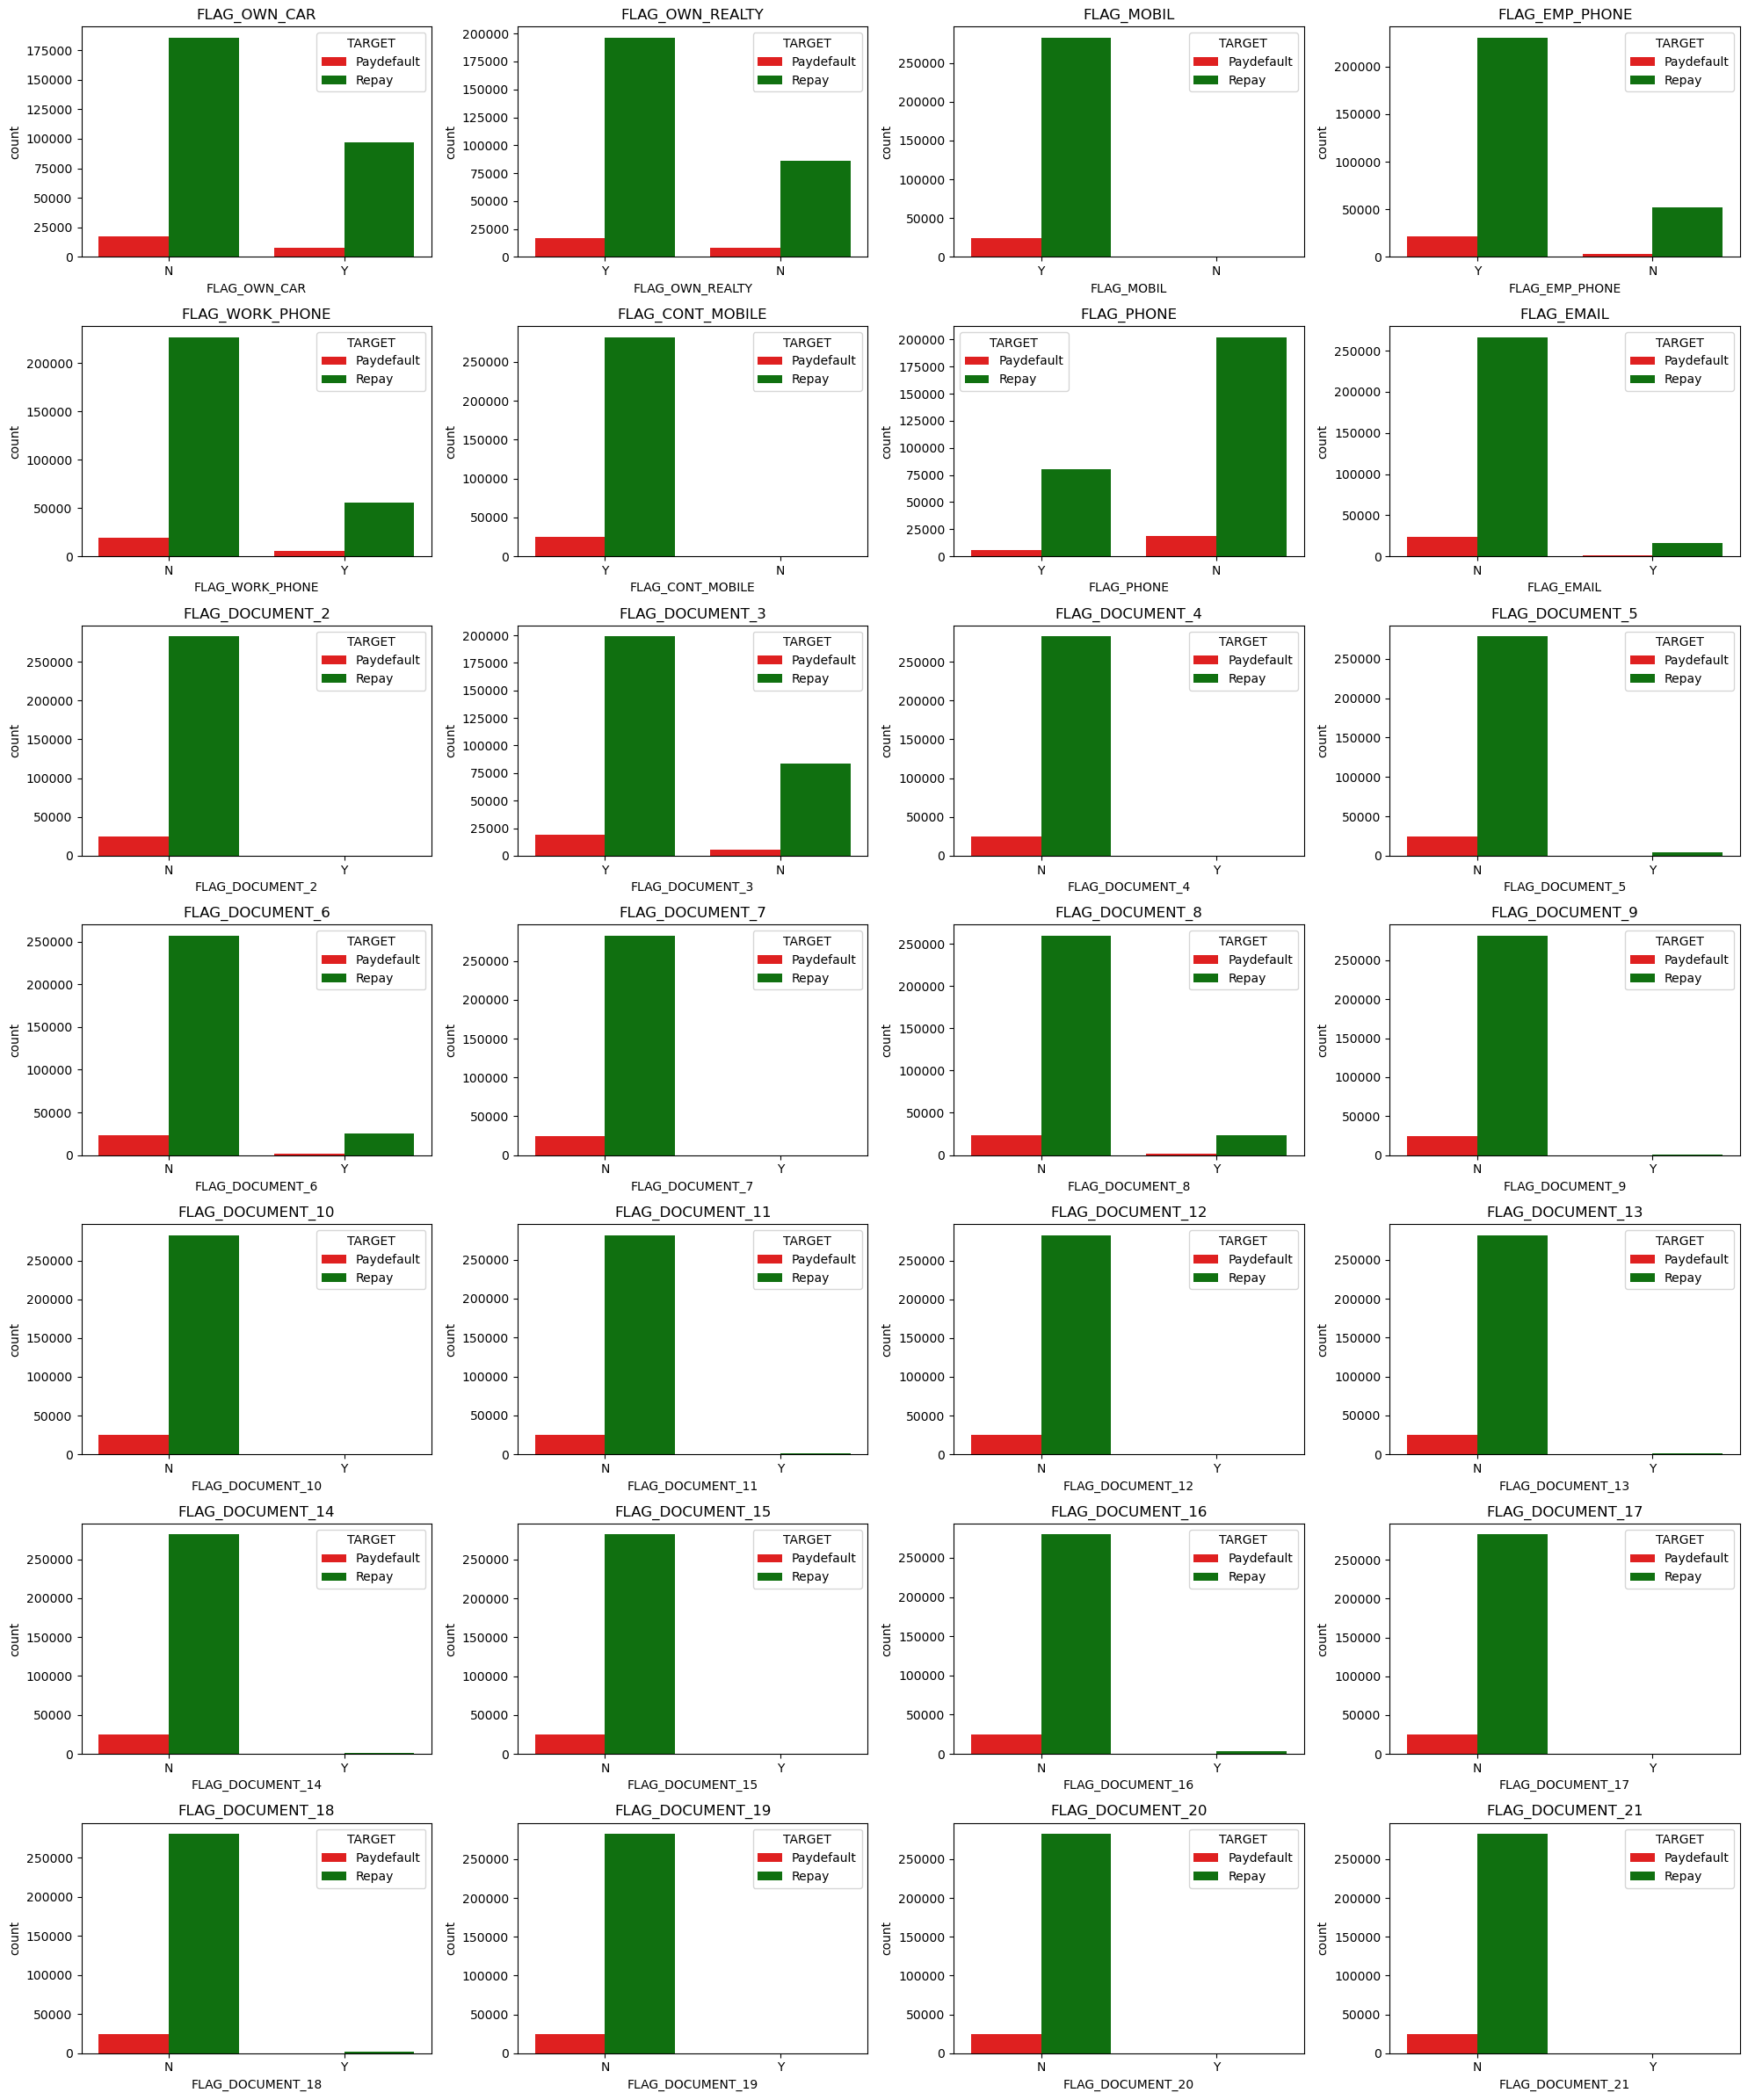

In [27]:
import itertools
# Plotting all the graphs to find the relation and evaluating for dropping such columns
plt.figure(figsize=[20, 24])

for i, j in itertools.zip_longest(FLAGS_columns, range(len(FLAGS_columns))):
    plt.subplot(7, 4, j + 1)
    ax = sns.countplot(data=FLAGS_dataset, x=i, hue="TARGET", palette=["r", "g"])    
    plt.title(i)
plt.tight_layout()
plt.show()

After obsering these graphs we see that Columns (FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3) 
have more 'Repay' than 'Paydefaul' so we keeping 'FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL' and drops other columns as below

In [28]:
FLAGS_dataset.shape

(307511, 29)

In [29]:
FLAGS_dataset.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [30]:
FLAGS_dataset.shape

(307511, 25)

In [31]:
appl_df.drop(FLAGS_dataset.columns, axis=1, inplace= True)

In [32]:
appl_df.shape

(307511, 46)

We removed all uneccsarry, irrelevent and missing columns, so now in data there are 46 columns are left. Now we will start process
of imputation for colunms that having missing values.


# Imputation for missing values

In [33]:
# checking again null values
round((100*appl_df.isnull().mean()).sort_values(ascending = False),2).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

We will only impute below 7 columns for further analysis are: 
OCCUPATION_TYPE, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR
as these columns have more than 1% missing values.
Imputing for "OCCUPATION_TYPE" column

In [34]:
100*appl_df["OCCUPATION_TYPE"].isnull().mean()

31.345545362604916

In [35]:
100*appl_df["OCCUPATION_TYPE"].value_counts(normalize = True)

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [36]:
# 31.345545362604916, so we will replace missing values with "Other" as this is categorical data
appl_df["OCCUPATION_TYPE"] = appl_df["OCCUPATION_TYPE"].fillna("Other") 
100*appl_df["OCCUPATION_TYPE"].isnull().mean()

0.0

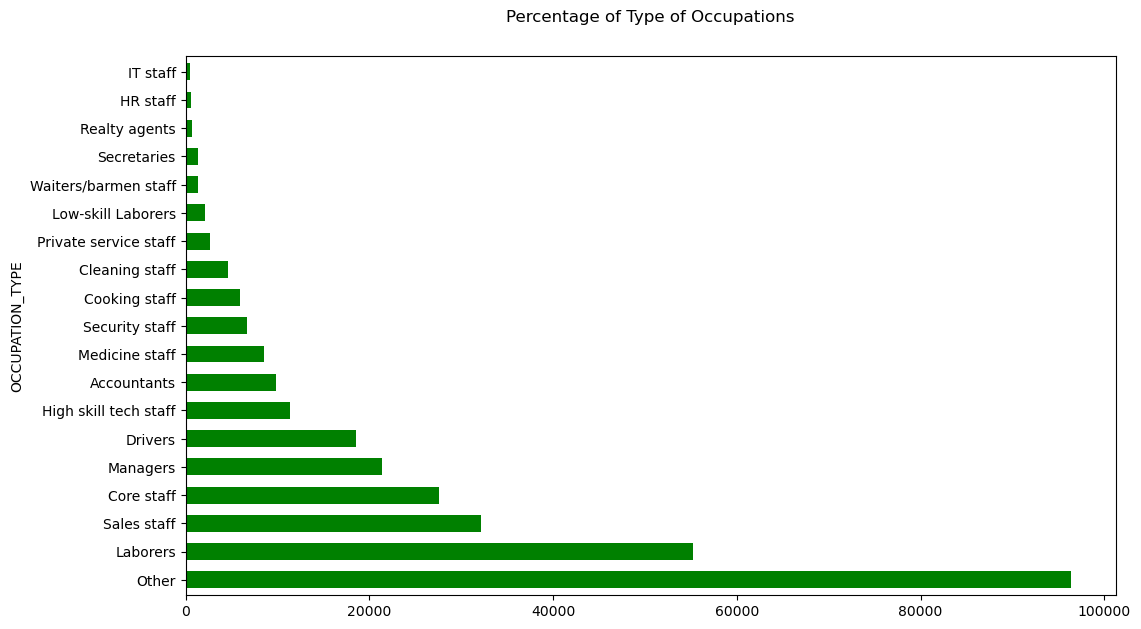

In [37]:
plt.figure(figsize = [12,7])
(appl_df["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "green",width = .6)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":12}, pad =25)
plt.show()

Heights values are belongs to "Other" categorical data.

Let's see other 6 columns

In [38]:
appl_df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [39]:
#filling missing values with median values
all_amt_credit= ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
appl_df.fillna(appl_df[all_amt_credit].median(),inplace = True)

In [40]:
# checking again null values.
round((100*appl_df.isnull().mean()).sort_values(ascending = False),2).head(10)

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
ORGANIZATION_TYPE           0.00
dtype: float64

Here we see stil some missing data in dataset, but we not impute them as the missing values are very less.

# Now we have to standardise some values in application dataset, as below -

In [41]:
appl_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000  307511.000000    307509.000000   
mean        -4986.120328     -2994.202373       0.999997         2.152665   
std          3522.886321      1509.450419       0.001803         0.910682   
min        -24672.000000     -7197.000000       0.000000         1.000000   
25%         -7479.500000     -4299.000000       1.000000         2.000000   
50%         -4504.000000     -3254.000000       1.000000         2.000000   
75%         -2010.000000     -1720.000000       1.000000         3.000000   
max             0.000000         0.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%  

We see here -
* columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns.
* columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE having -ve values, that we convert ot +ve.
* convert DAYS_BIRTH, DAYS_EMPLOYED to YEARS EMPLOYED, it Years, for better understanding

In [42]:
# Binning used as below -
appl_df['AMT_INCOME_TOTAL']=appl_df['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
appl_df['AMT_INCOME_TOTAL_RANGE']=pd.cut(appl_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [43]:
round((appl_df["AMT_INCOME_TOTAL_RANGE"].value_counts(normalize = True)*100),2)

AMT_INCOME_TOTAL_RANGE
1L-2L        50.73
2L-3L        21.21
0-1L         20.73
3L-4L         4.78
4L-5L         1.74
5L-6L         0.36
6L-7L         0.28
8L-9L         0.10
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: proportion, dtype: float64

In [44]:
appl_df['AMT_CREDIT']=appl_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_df['AMT_ALL_CREDIT_RANGE']=pd.cut(appl_df['AMT_CREDIT'],bins=bins,labels=slots)

In [45]:
round((appl_df["AMT_ALL_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

AMT_ALL_CREDIT_RANGE
2L-3L        17.82
10L Above    16.25
5L-6L        11.13
4L-5L        10.42
1L-2L         9.80
3L-4L         8.56
6L-7L         7.82
8L-9L         7.09
7L-8L         6.24
9L-10L        2.90
0-1L          1.95
Name: proportion, dtype: float64

In [46]:
appl_df['AMT_GOODS_PRICE']=appl_df['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_df['AMT_ALL_GOODS_PRICE_RANGE']=pd.cut(appl_df['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [47]:
round((appl_df["AMT_ALL_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

AMT_ALL_GOODS_PRICE_RANGE
2L-3L        20.43
4L-5L        18.54
6L-7L        13.03
10L Above    11.11
1L-2L        10.73
8L-9L         6.99
3L-4L         6.91
5L-6L         4.27
0-1L          2.83
7L-8L         2.64
9L-10L        2.53
Name: proportion, dtype: float64

=========================================================================================================

Now we do imputation for "DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE" colomns

In [48]:
DAYS_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
appl_df[DAYS_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [49]:
#we correct the days values, by using abs() function to 
appl_df[DAYS_col]= abs(appl_df[DAYS_col])
appl_df[DAYS_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

We have to convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years then binning the years for better understanding.

In [50]:
appl_df["AGE"] = appl_df["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

appl_df["AGE_GROUP"] = pd.cut(appl_df["AGE"], bins=bins, labels=slots)

In [51]:
appl_df["AGE_GROUP"].value_counts(normalize= True)*100

AGE_GROUP
35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: proportion, dtype: float64

In [52]:
appl_df["YEARS_EMPLOYED"] = appl_df["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]
appl_df["EMPLOYEMENT_YEARS"] = pd.cut(appl_df["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [53]:
appl_df["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

EMPLOYEMENT_YEARS
0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: proportion, dtype: float64

==============================================================================================================================

# Now looking for Outliers in applicant's dataset

In [54]:
appl_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000  307499.000000    307233.000000   
mean        5.990260   27108.573909         5.383962   
std         4.024908   14493.737315         3.694465   
min         0.450000    1615.500000         0.405000   
25%         2.700000   16524.000000         2.385000   
50%         5.135310   24903.000000         4.500000   
75%         8.086500   34596.000000         6.795000   
max        40.500000  258025.500000        40.500000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000  307511.000000    307509.000000   
mean         4986.120328      2994.202373       0.999997         2.152665   
std          3522.886321      1509.450419       0.001803         0.910682   
min             0.000000         0.000000       0.000000         1.000000   
25%          2010.000000      1720.000000       1.000000         2.000000   
50%          4504.000000      3254.000000       1.000000         2.000000   
75%          7479.500000      4299.000000       1.000000         3.000000   
max         24672.000000      7197.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000

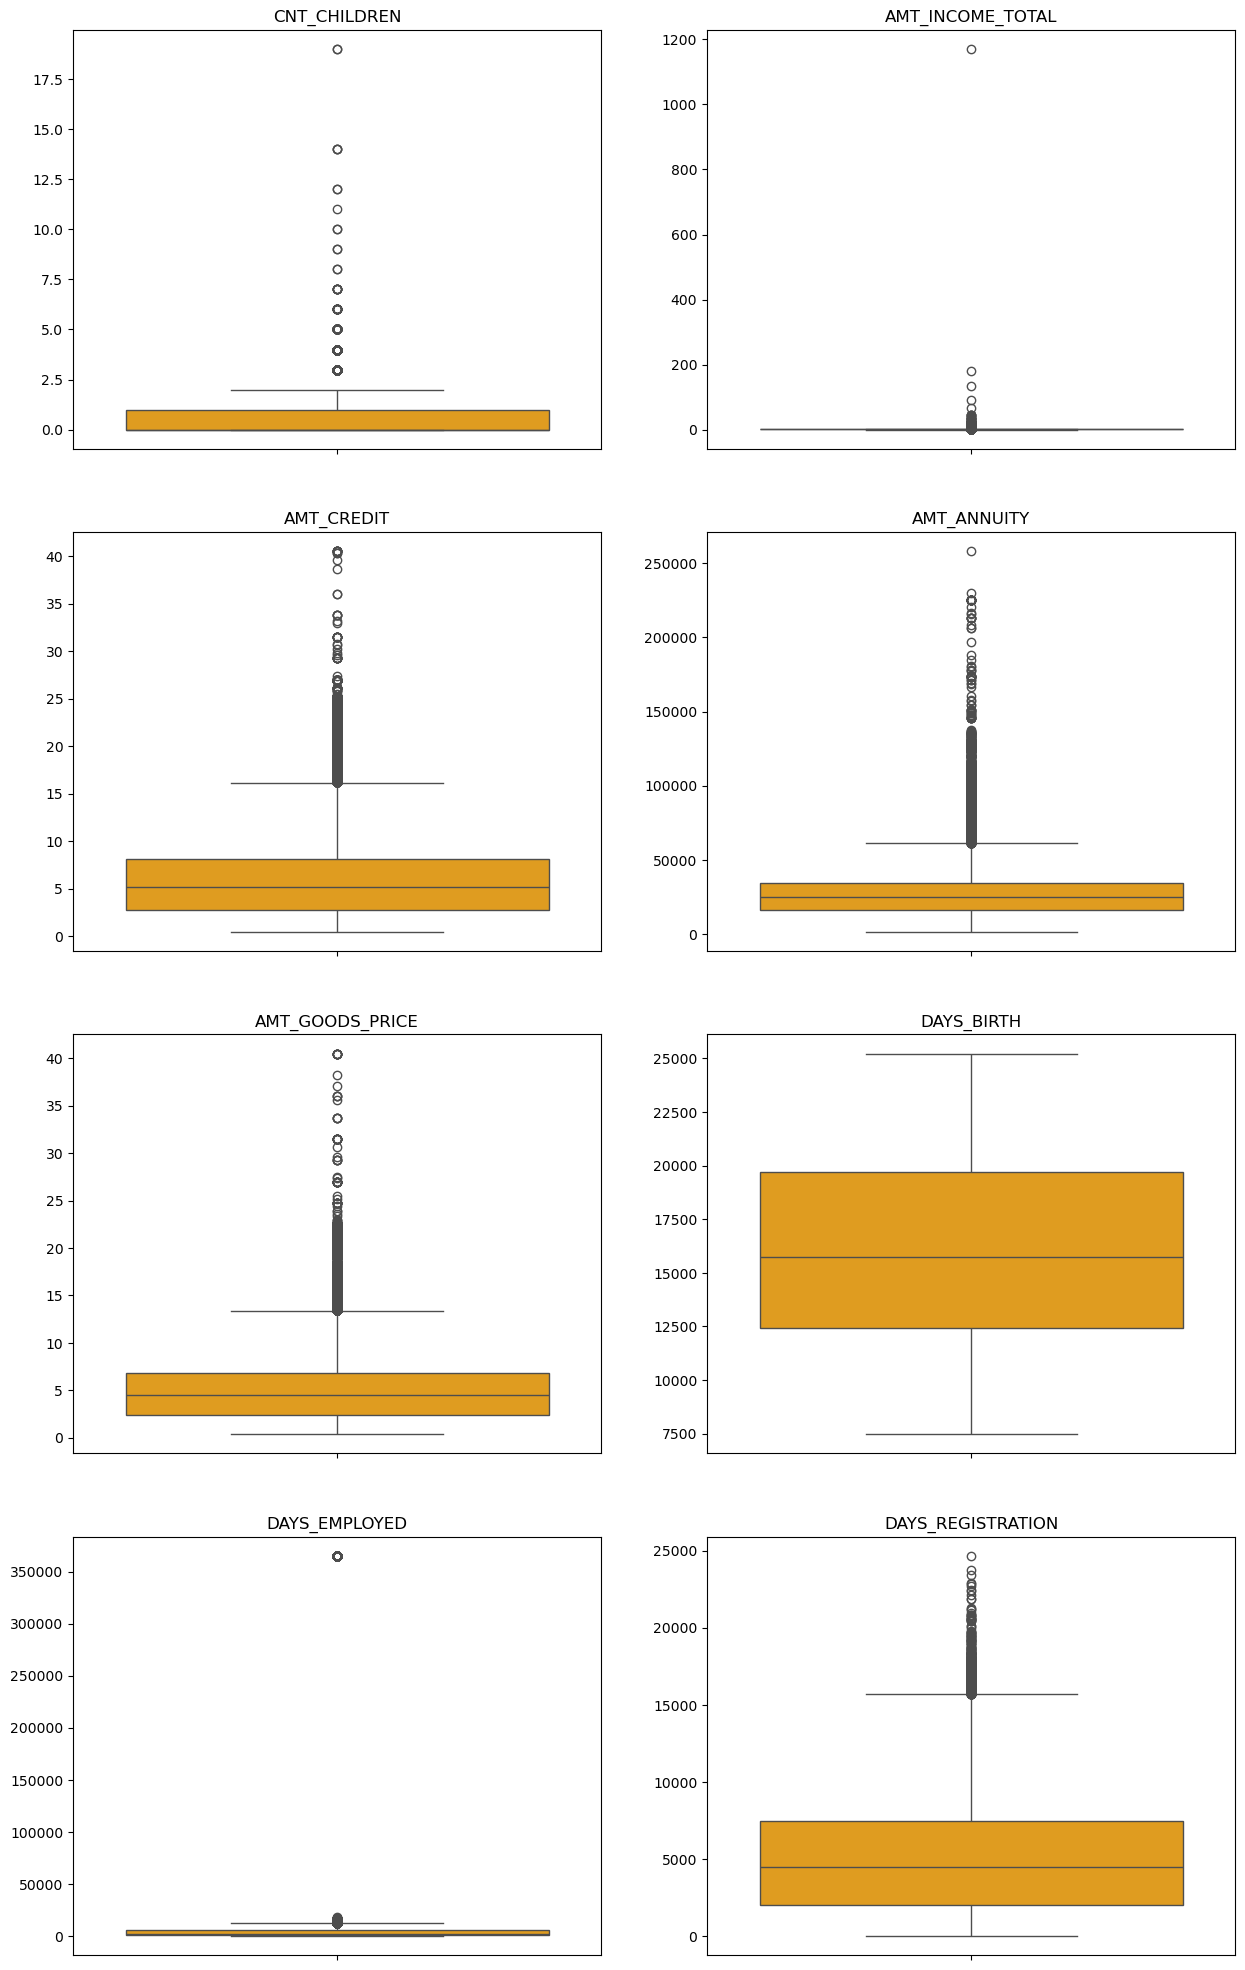

In [55]:
OUTLIER_CLOS = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(OUTLIER_CLOS, range(len(OUTLIER_CLOS))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = appl_df[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

# Above boxplots analysis -
* AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
* Few of the loan applicants have high income when compared to the others as data in AMT_INCOME_TOTAL has huge number of outliers.
* DAYS_BIRTH has no outliers which means the data available is reliable.
* DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.
* Outcome for CNT_CHILDREN looks like not correct as number of childerns showing outliers.

In [56]:
# Checking for datatypes
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [57]:
appl_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_R

In [58]:
CAT_COL = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

len(CAT_COL)

21

In [59]:
for col in CAT_COL:
    appl_df[col] = pd.Categorical(appl_df[col])

In [60]:
appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  category
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

* We have 53 columns to do anaysis.
* ===================================================================================================================
* ===================================================================================================================
* ===================================================================================================================

# * Now will check Dataset 2 - "previous_application.csv""previous_application.csv"

In [61]:
prev_df = pd.read_csv("previous_application.csv")

In [62]:
prev_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [63]:
prev_df.shape

(1670214, 37)

In [64]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [65]:
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

There are 37 columns and 1679214 rows.
Fixing is required for negative values.

In [66]:
# checking null values, we round values with ascending order for better and quick understanding.
round((100*prev_df.isnull().mean()).sort_values(ascending = False),2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

Below I am doing Data cleaning and Manipulation

In [67]:
## There are columns are having more that 50% missing values, first we will check that all columns as below -
cut_off=50
cols_to_drop1=list(prev_df.columns[100*prev_df.isnull().mean()>cut_off])
print(cols_to_drop1)
print("No. of columns to be dropped:",len(cols_to_drop1))

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']
No. of columns to be dropped: 4


In [68]:
prev_df=prev_df.drop(cols_to_drop1,axis=1)

In [69]:
prev_df.shape

(1670214, 33)

In [70]:
prev_df["NAME_TYPE_SUITE"] = prev_df["NAME_TYPE_SUITE"].fillna("Unknown")

In [71]:
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
pay_null_col_15 = null_values(prev_df)[null_values(prev_df)>15]

In [72]:
pay_null_col_15

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_LAST_DUE                40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [73]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [74]:
#we removing unwanted data columns fro prev_df detaset
unwanted_col= ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
prev_df.drop(unwanted_col, axis = 1, inplace = True)
prev_df.shape

(1670214, 29)

In [75]:
null_values(prev_df)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
SK_ID_PREV                    0.00
NAME_PORTFOLIO                0.00
SK_ID_CURR                    0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
NAME_GOODS_CATEGORY 

The columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' 
having missing values which will keeping null values as they are days count.

In [76]:
prev_df[pay_null_col_15.index].describe()

NFLAG_INSURED_ON_APPROVAL  DAYS_LAST_DUE  DAYS_FIRST_DUE  \
count              997149.000000  997149.000000   997149.000000   
mean                    0.332570   76582.403064    13826.269337   
std                     0.471134  149647.415123    72444.869708   
min                     0.000000   -2889.000000    -2892.000000   
25%                     0.000000   -1314.000000    -1628.000000   
50%                     0.000000    -537.000000     -831.000000   
75%                     1.000000     -74.000000     -411.000000   
max                     1.000000  365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING  DAYS_TERMINATION  \
count              997149.000000       997149.000000     997149.000000   
mean                33767.774054       342209.855039      81992.343838   
std                106857.034789        88916.115834     153303.516729   
min                 -2801.000000        -2922.000000      -2874.000000   
25%                 -1242.000000       365243.000000      -1270.000000   
50%                  -361.000000       365243.000000       -499.000000   
75%                   129.000000       365243.000000        -44.000000   
max                365243.000000       365243.000000     365243.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

In [77]:
# Let's check for -ve values
pay_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
prev_df[pay_days_col].describe()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count   1.670214e+06       997149.000000   997149.000000   
mean   -8.806797e+02       342209.855039    13826.269337   
std     7.790997e+02        88916.115834    72444.869708   
min    -2.922000e+03        -2922.000000    -2892.000000   
25%    -1.300000e+03       365243.000000    -1628.000000   
50%    -5.810000e+02       365243.000000     -831.000000   
75%    -2.800000e+02       365243.000000     -411.000000   
max    -1.000000e+00       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                33767.774054   76582.403064      81992.343838  
std                106857.034789  149647.415123     153303.516729  
min                 -2801.000000   -2889.000000      -2874.000000  
25%                 -1242.000000   -1314.000000      -1270.000000  
50%                  -361.000000    -537.000000       -499.000000  
75%                   129.000000     -74.000000        -44.000000  
max                365243.000000  365243.000000     365243.000000

In [78]:
prev_df[pay_days_col] = abs(prev_df[pay_days_col])

In [79]:
# we convrted -ve to +ve values, check-
prev_df[pay_null_col_15.index].describe()

NFLAG_INSURED_ON_APPROVAL  DAYS_LAST_DUE  DAYS_FIRST_DUE  \
count              997149.000000  997149.000000   997149.000000   
mean                    0.332570   78152.730207    15949.224065   
std                     0.471134  148833.342466    72007.270877   
min                     0.000000       2.000000        2.000000   
25%                     0.000000     455.000000      475.000000   
50%                     0.000000    1155.000000      921.000000   
75%                     1.000000    2418.000000     1825.000000   
max                     1.000000  365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING  DAYS_TERMINATION  \
count              997149.000000       997149.000000     997149.000000   
mean                35163.363265       342340.056543      83505.775017   
std                106405.950190        88413.495220     152484.418802   
min                     0.000000            2.000000          2.000000   
25%                   257.000000       365243.000000        447.000000   
50%                   741.000000       365243.000000       1171.000000   
75%                  1735.000000       365243.000000       2501.000000   
max                365243.000000       365243.000000     365243.000000   

       AMT_GOODS_PRICE   AMT_ANNUITY   CNT_PAYMENT  
count     1.284699e+06  1.297979e+06  1.297984e+06  
mean      2.278473e+05  1.595512e+04  1.605408e+01  
std       3.153966e+05  1.478214e+04  1.456729e+01  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       5.084100e+04  6.321780e+03  6.000000e+00  
50%       1.123200e+05  1.125000e+04  1.200000e+01  
75%       2.340000e+05  2.065842e+04  2.400000e+01  
max       6.905160e+06  4.180581e+05  8.400000e+01

In [80]:
# we grouping days in years as below-
bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_df['YEARLY_DECISION'] = pd.cut(prev_df['DAYS_DECISION'], bins, labels = slots)

In [81]:
prev_df['YEARLY_DECISION'].value_counts(normalize=True)*100

YEARLY_DECISION
1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 above     5.060729
6           4.850037
Name: proportion, dtype: float64

# Observation
There are 35% applicants have applied within 1 year of previous loan

In [82]:
prev_df.nunique()

SK_ID_PREV                   1670214
SK_ID_CURR                    338857
NAME_CONTRACT_TYPE                 4
AMT_ANNUITY                   357959
AMT_APPLICATION                93885
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
NAME_CASH_LOAN_PURPOSE            25
NAME_CONTRACT_STATUS               4
DAYS_DECISION                   2922
NAME_PAYMENT_TYPE                  4
CODE_REJECT_REASON                 9
NAME_TYPE_SUITE                    8
NAME_CLIENT_TYPE                   4
NAME_GOODS_CATEGORY               28
NAME_PORTFOLIO                     5
NAME_PRODUCT_TYPE                  3
CHANNEL_TYPE                       8
SELLERPLACE_AREA                2097
NAME_SELLER_INDUSTRY              11
CNT_PAYMENT                       49
NAME_YIELD_GROUP                   5
PRODUCT_COMBINATION               17
DAYS_FIRST_DRAWING              2838
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2873
D

In [83]:
null_values(prev_df)

NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
AMT_CREDIT                    0.00
SK_ID_PREV                    0.00
CHANNEL_TYPE                  0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
SK_ID_CURR                    0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
NAME_TYPE_SUITE               0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

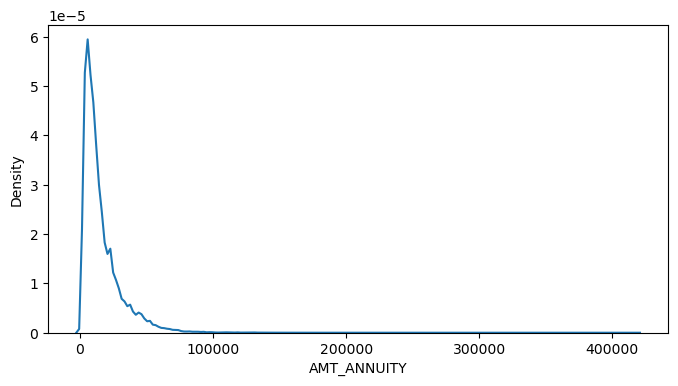

In [84]:
# Now imputing 2 numeric variables as below
plt.figure(figsize=(8,4))
sns.kdeplot(prev_df['AMT_ANNUITY'])
plt.show()

As we see in graph, peak on leftside show outliers, we have to treat with median value.

In [85]:
prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].median(), inplace = True)

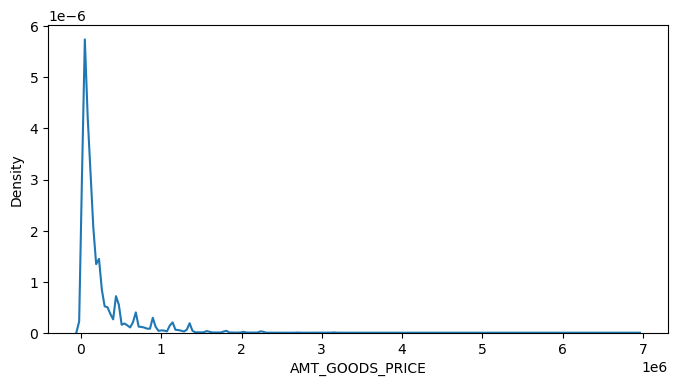

In [86]:
plt.figure(figsize=(8,4))
sns.kdeplot(prev_df['AMT_GOODS_PRICE'])
plt.show()

As we see more than 1 peak on left side we impute this with Mode().

In [87]:
prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode(), inplace = True)

In [88]:
prev_df.loc[prev_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [89]:
# we imputing this with '0', as loan is yet not started
prev_df['CNT_PAYMENT'].fillna(0, inplace= True)

In [90]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'],
      dtype='object')

In [91]:
pre_Cat_Col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']
for col in pre_Cat_Col:
    prev_df[col] = pd.Categorical(prev_df[col])

# Find out outliers

In [92]:

prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.284699e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.278473e+05   8.806797e+02      3.139511e+02   
std    3.185746e+05     3.153966e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00   
25%    2.416050e+04     5.084100e+04   2.800000e+02     -1.000000e+00   
50%    8.054100e+04     1.123200e+05   5.810000e+02      3.000000e+00   
75%    2.164185e+05     2.340000e+05   1.300000e+03      8.200000e+01   
max    6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.670214e+06       997149.000000   997149.000000   
mean   1.247621e+01       342340.056543    15949.224065   
std    1.447588e+01        88413.495220    72007.270877   
min    0.000000e+00            2.000000        2.000000   
25%    0.000000e+00       365243.000000      475.000000   
50%    1.000000e+01       365243.000000      921.000000   
75%    1.600000e+01       365243.000000     1825.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                35163.363265   78152.730207      83505.775017   
std                106405.950190  148833.342466     152484.418802   
min                     0.000000       2.000000          2.000000   
25%                   257.000000     455.000000        447.000000   
50%                   741.000000    1155.000000       1171.000000   
75%                  1735.000000    2418.000000       2501.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

In [93]:
#With help of below graphs, we can check furhter for high values showing in aboeve describe values for max and 75%

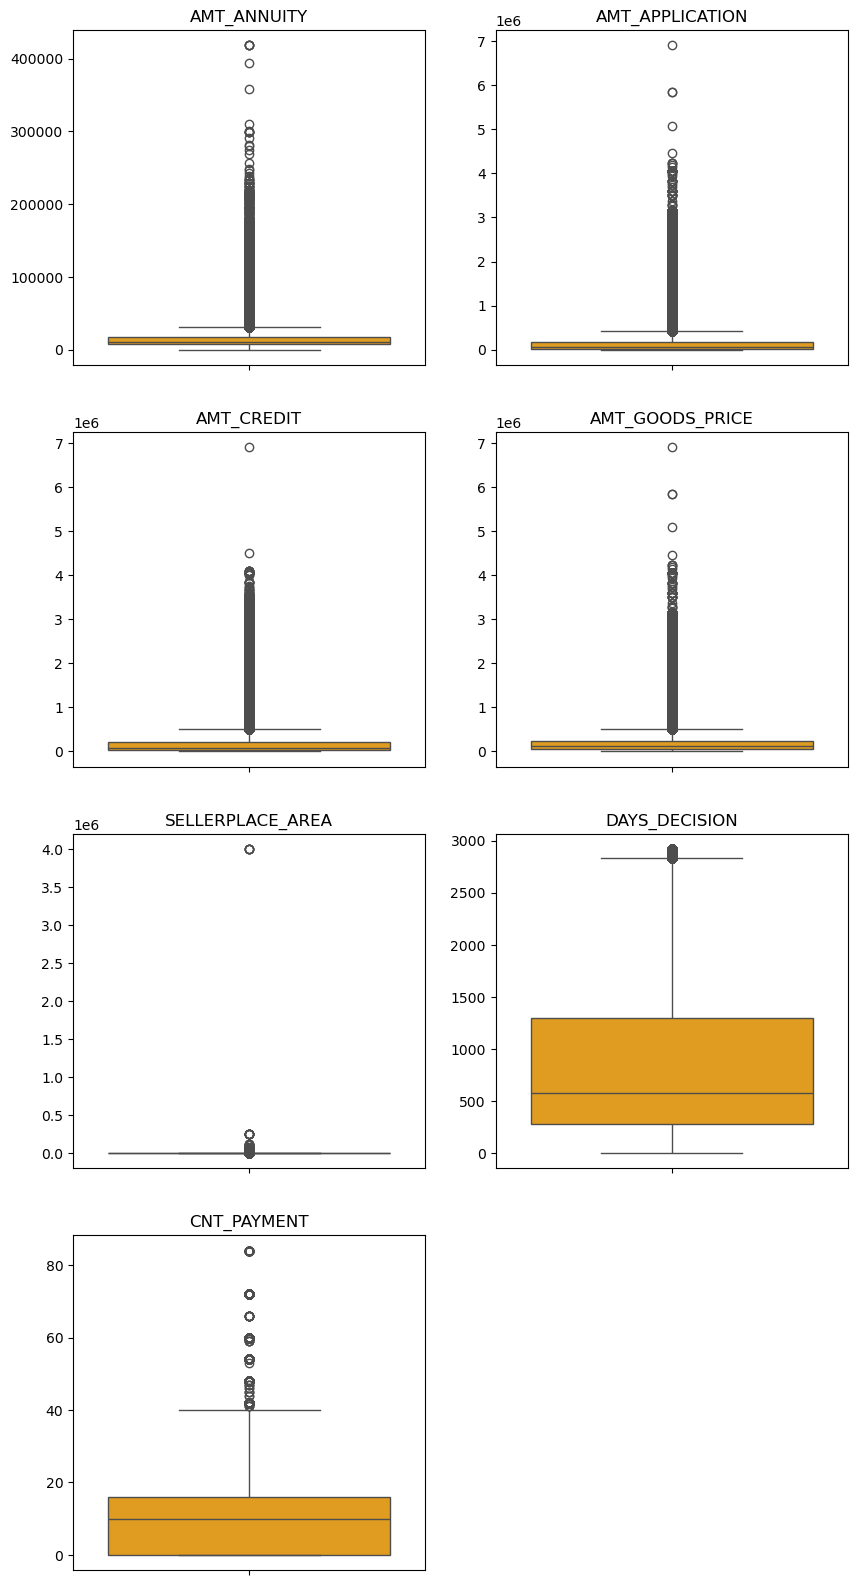

In [94]:
prevdata_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[10,20])
for i,j in itertools.zip_longest(prevdata_outlier_col, range(len(prevdata_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = prev_df[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

CNT_PAYMENT has few outlier values.

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.

===================================================================================================

# Now we perform Data Analysis process

As in EDA we follow below points to make business decision-
* Imbalance in Data
* Categorical Data Analysis
    * Categorical segmented Univariate Analysis
    * Categorical Bi/Multivariate analysis
    
    
* Numeric Data Analysis
    * Bi-furcation of databased based on TARGET data
    * Correlation Matrix
    * Numerical segmented Univariate Analysis
    * Numerical Bi/Multivariate analysis

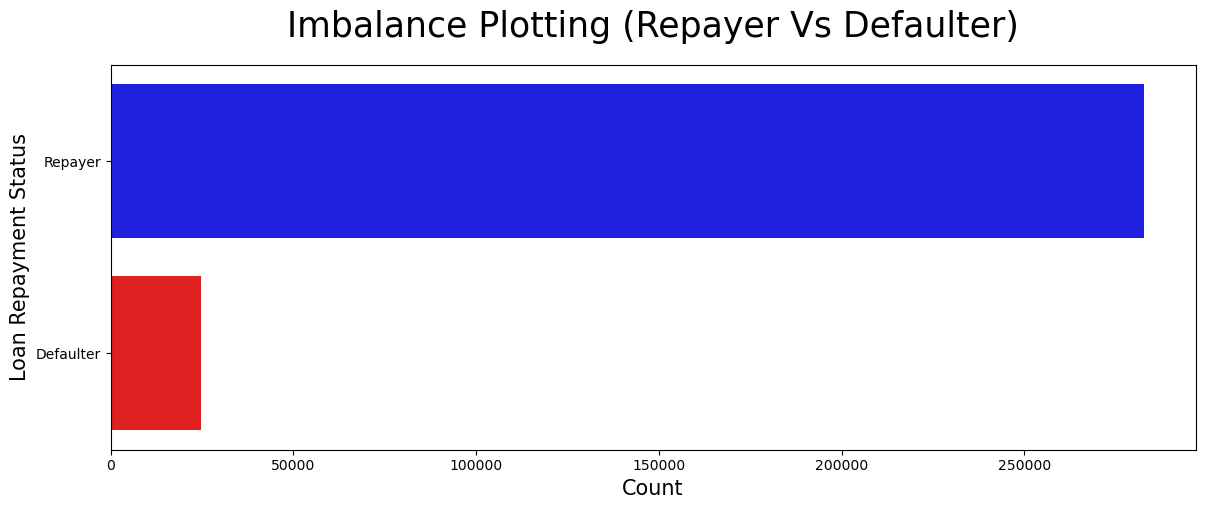

In [95]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = appl_df["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.show()

# Inference :
As we see in this graph, there is significant difference between 'Repayer' and 'Defaulter'. We will check ratio as below -

In [96]:
repayer = round((appl_df["TARGET"].value_counts()[0]/len(appl_df)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((appl_df["TARGET"].value_counts()[1]/len(appl_df)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)


========================================================================================================

Now we define function for doling Univariate Analysis -
Function arguments are, dataset, col, target_col, ylog, x_label, h_layout
Using this function we will plot 2 types of graphs -1 Count-, % of defaulter in column

In [97]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()


In [98]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [99]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [100]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


In [101]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)


In [102]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(appl_df.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(appl_df.select_dtypes(["int","float"]).columns)  # Numerical Column list


In [103]:
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_TOTAL_RANGE',
 'AMT_ALL_CREDIT_RANGE',
 'AMT_ALL_GOODS_PRICE_RANGE',
 'AGE_GROUP',
 'EMPLOYEMENT_YEARS']

# We start Categorical Analysis

# Univariate Analysis
Using univariate function to plot graphs and we will find inferable by observing these graphs.

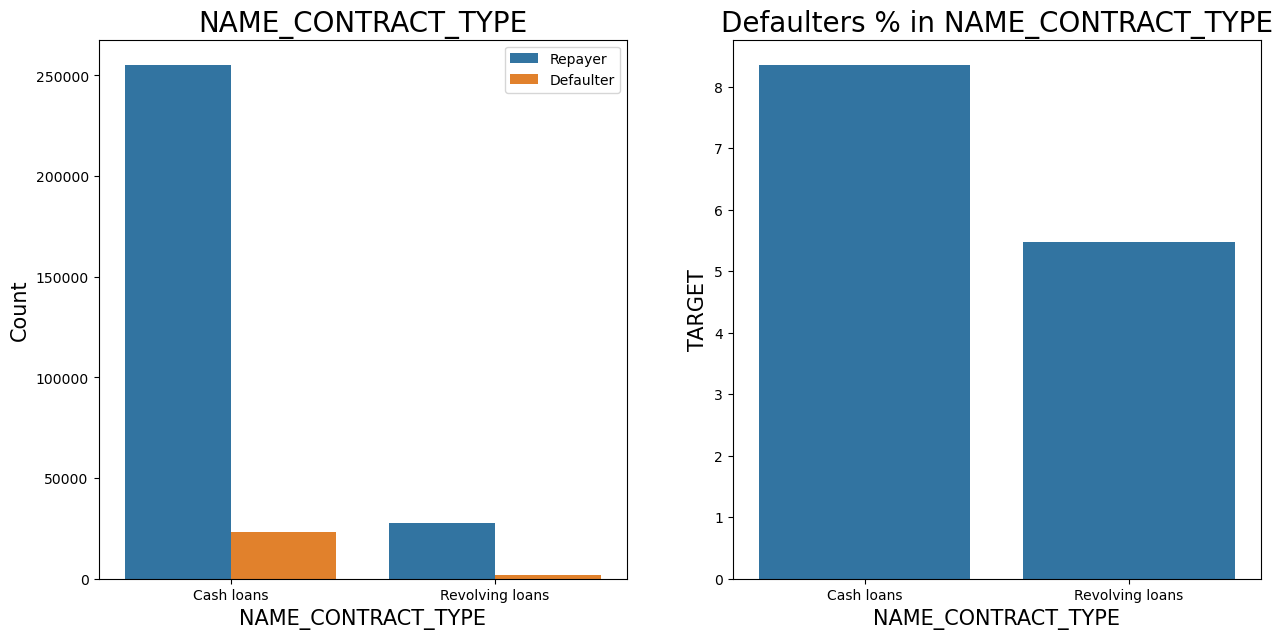

In [104]:
#1 Checking the contract type based on loan repayment status
univariate(appl_df,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

* inferences:

* Revolving loans, means loan for buying any goods, are just a small fraction (10%) from the total number of loans
* Defaulters are in 8-9% Cash loan applicants and 5-6% Revolving loan applicant.

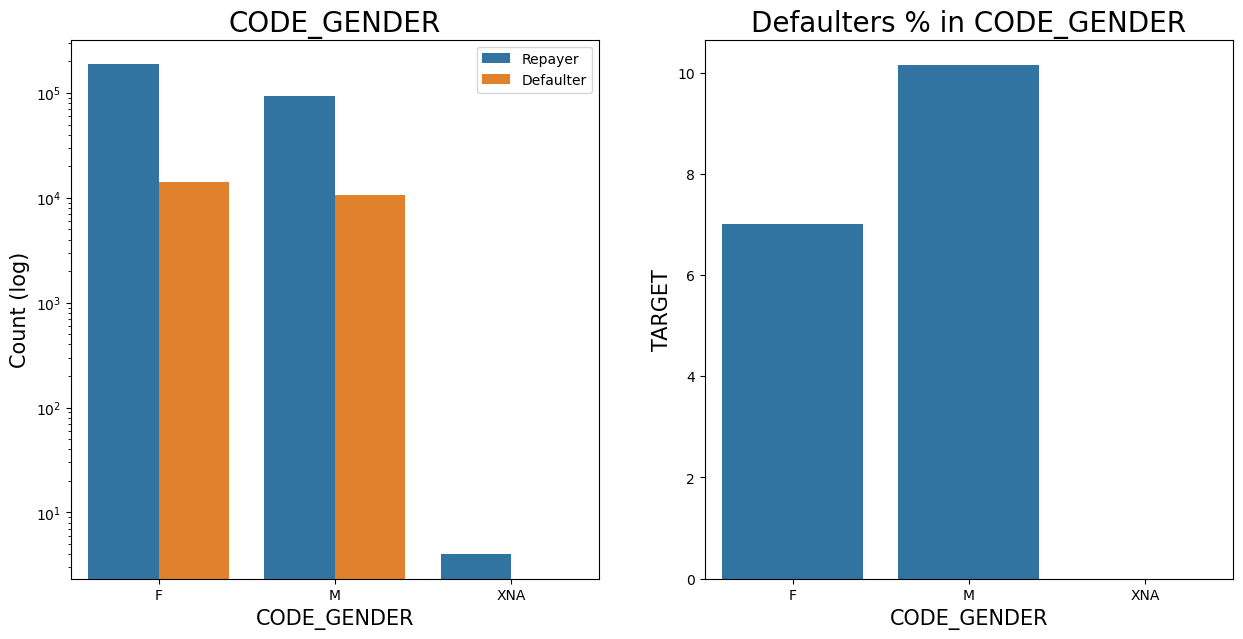

In [105]:
#2 Checking Target, gender
univariate(appl_df,"CODE_GENDER","TARGET",True,False,True)

* Inferences: 
* The number of female loan applicants is almost double the number of male applicants.
* Based on the percentage of defaulted credits, chance of males’ defaulters 10% is higher than female 7%.

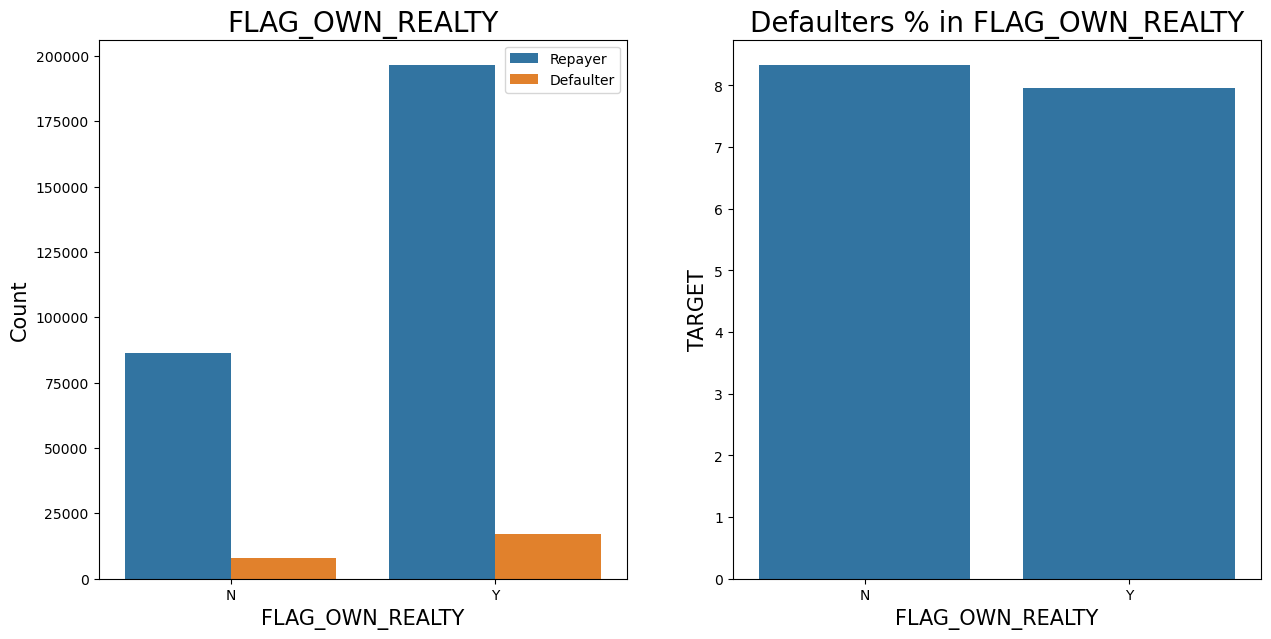

In [106]:
#3 Target and own property
univariate(appl_df,"FLAG_OWN_REALTY","TARGET",False,False,True)

* Inferences:

* There are property owner are more applicants than don’t own property.
* The defaulting rate is same for both, own and don’t own property (8%), which means correlation between owning a property and defaulting the loan.


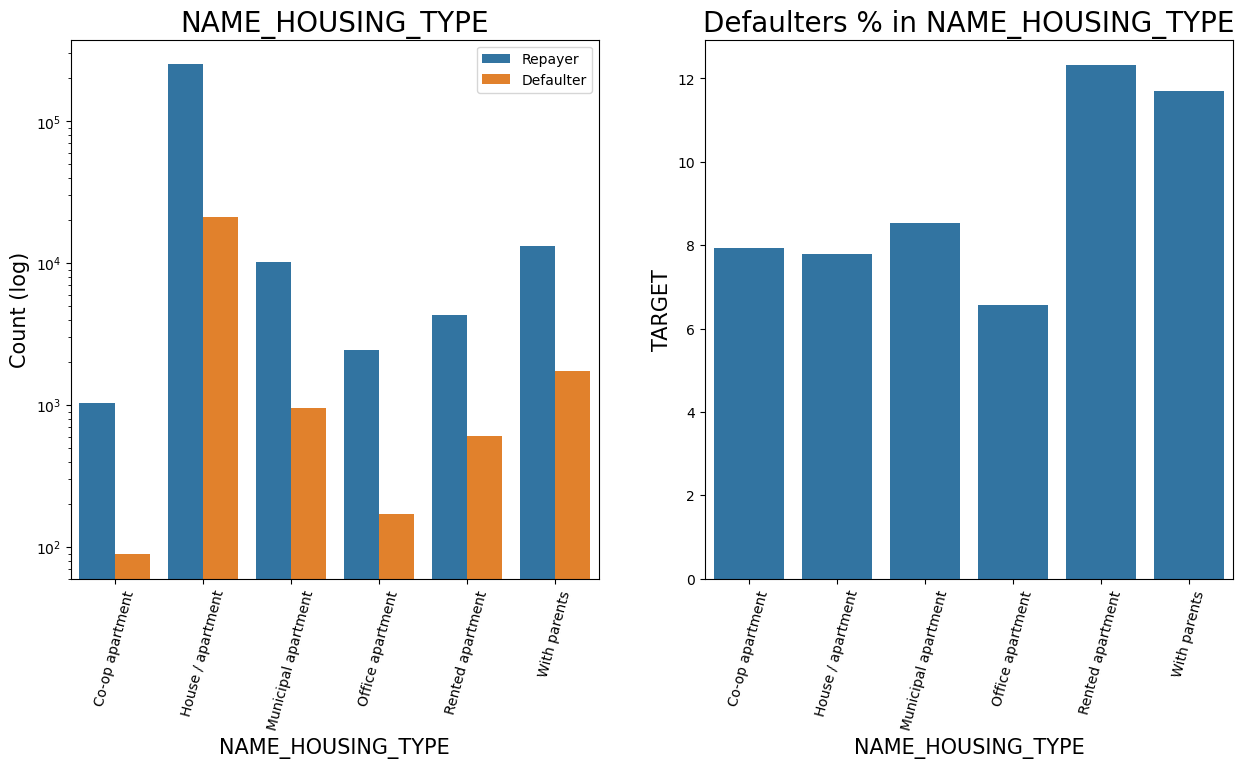

In [107]:
# Type of Housing based and repayment 
univariate(appl_df,"NAME_HOUSING_TYPE","TARGET",True,True,True)

* Inferences: 

* Majority of applicants are live in House/apartment and applicants living in office apartments have lowest default rate
* The applicants who are living with parents (11.5%) and living in rented apartments(>12%) have higher probability of defaulting

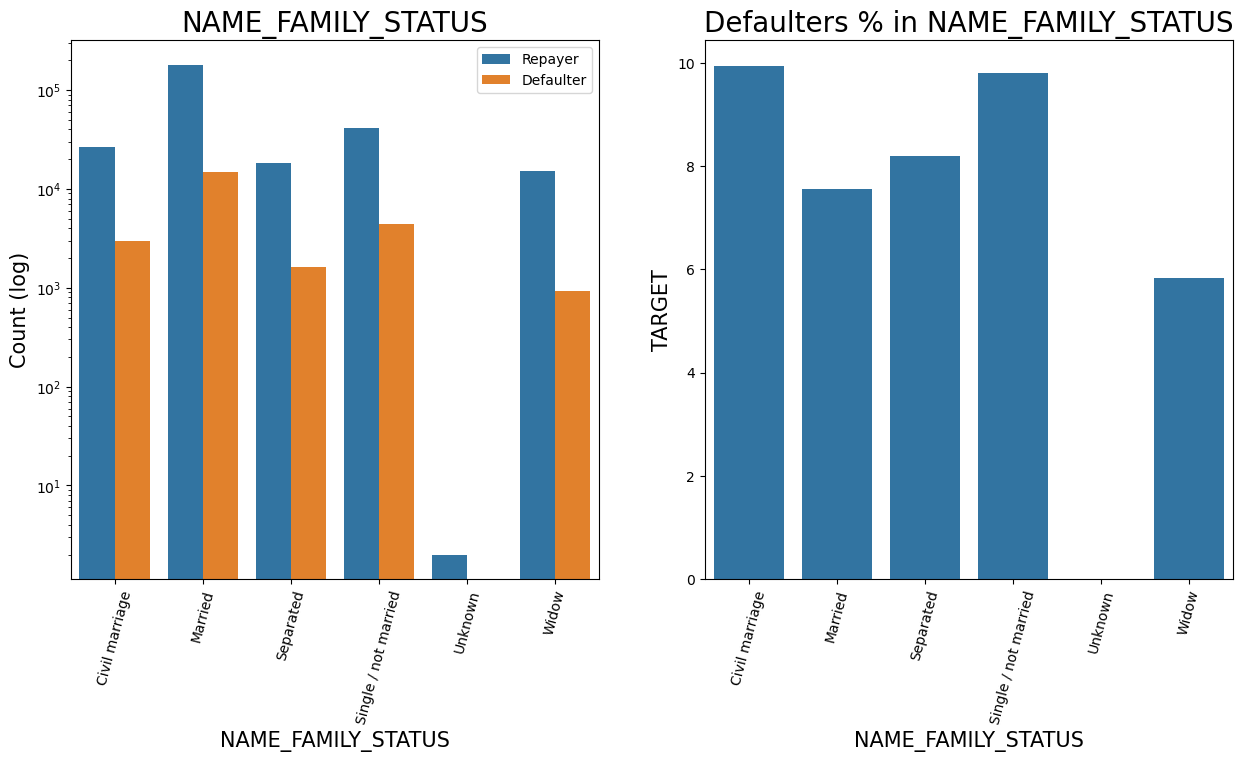

In [108]:
# Family status based on loan repayment 
univariate(appl_df,"NAME_FAMILY_STATUS","TARGET",True,True,True)

* Inferences:

* Married have applied more then followed by Single/not married and civil marriage, applicants
* In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).

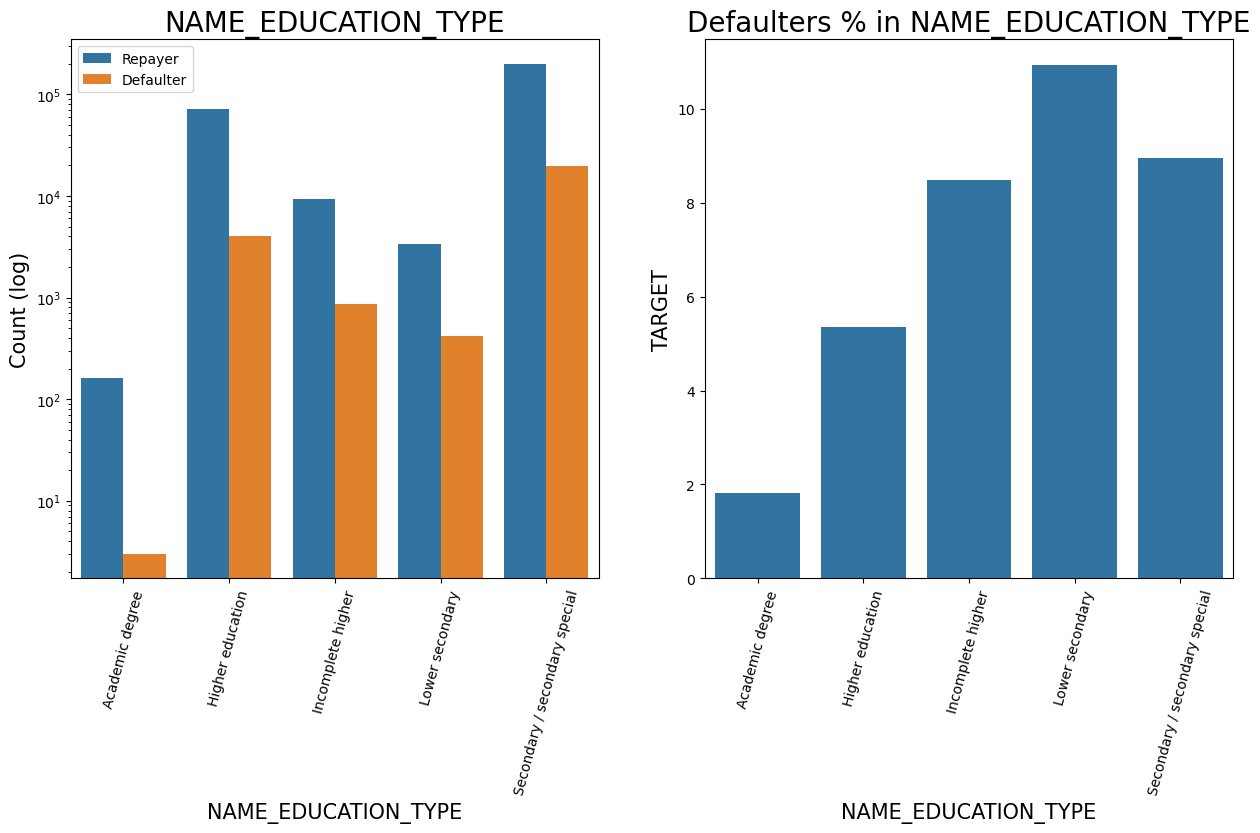

In [109]:
# Education Type based on loan repayment 
univariate(appl_df,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

* Inferences: 
* Majority of applicants have Secondary/secondary special education, followed by applicants with Higher education.
* Lower secondary category have highest rate of defaulting around 11%. People with Academic degree are least likely to default and  very few applicants have an academic degree.


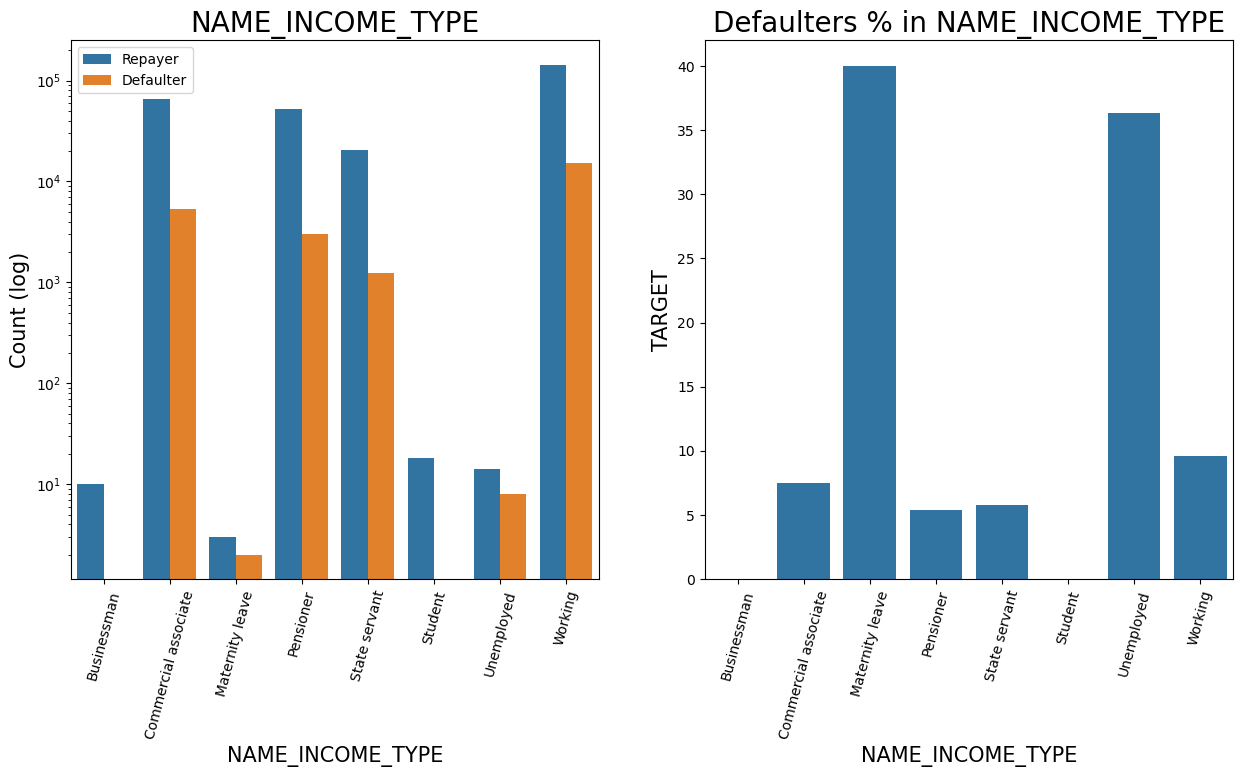

In [110]:
# Income Type based on loan repayment 
univariate(appl_df,"NAME_INCOME_TYPE","TARGET",True,True,True)

* Inferences:
* The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%).  The rest under average around 10%   defaulters.
* Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.
* Student and Businessmen though less in numbers, do not have default record.  Safest two categories for providing loan. 


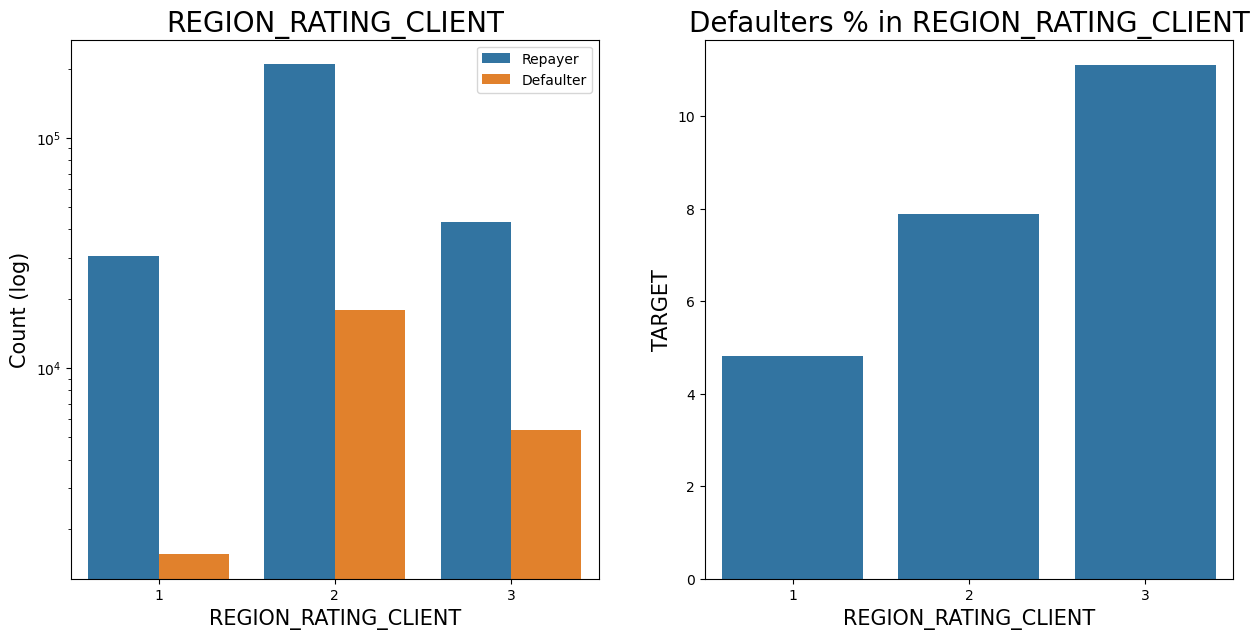

In [111]:
# Region rating where applicant lives based on loan repayment 
univariate(appl_df,"REGION_RATING_CLIENT","TARGET",True,False,True)

* Inferences:

* Most of the applicants are living in Region with Rating 2 place. Region Rating 3 has the highest default rate (11%)

* Applicant living in Region_Rating 1 are safer for approving loanshas the lowest probability of defaulting.


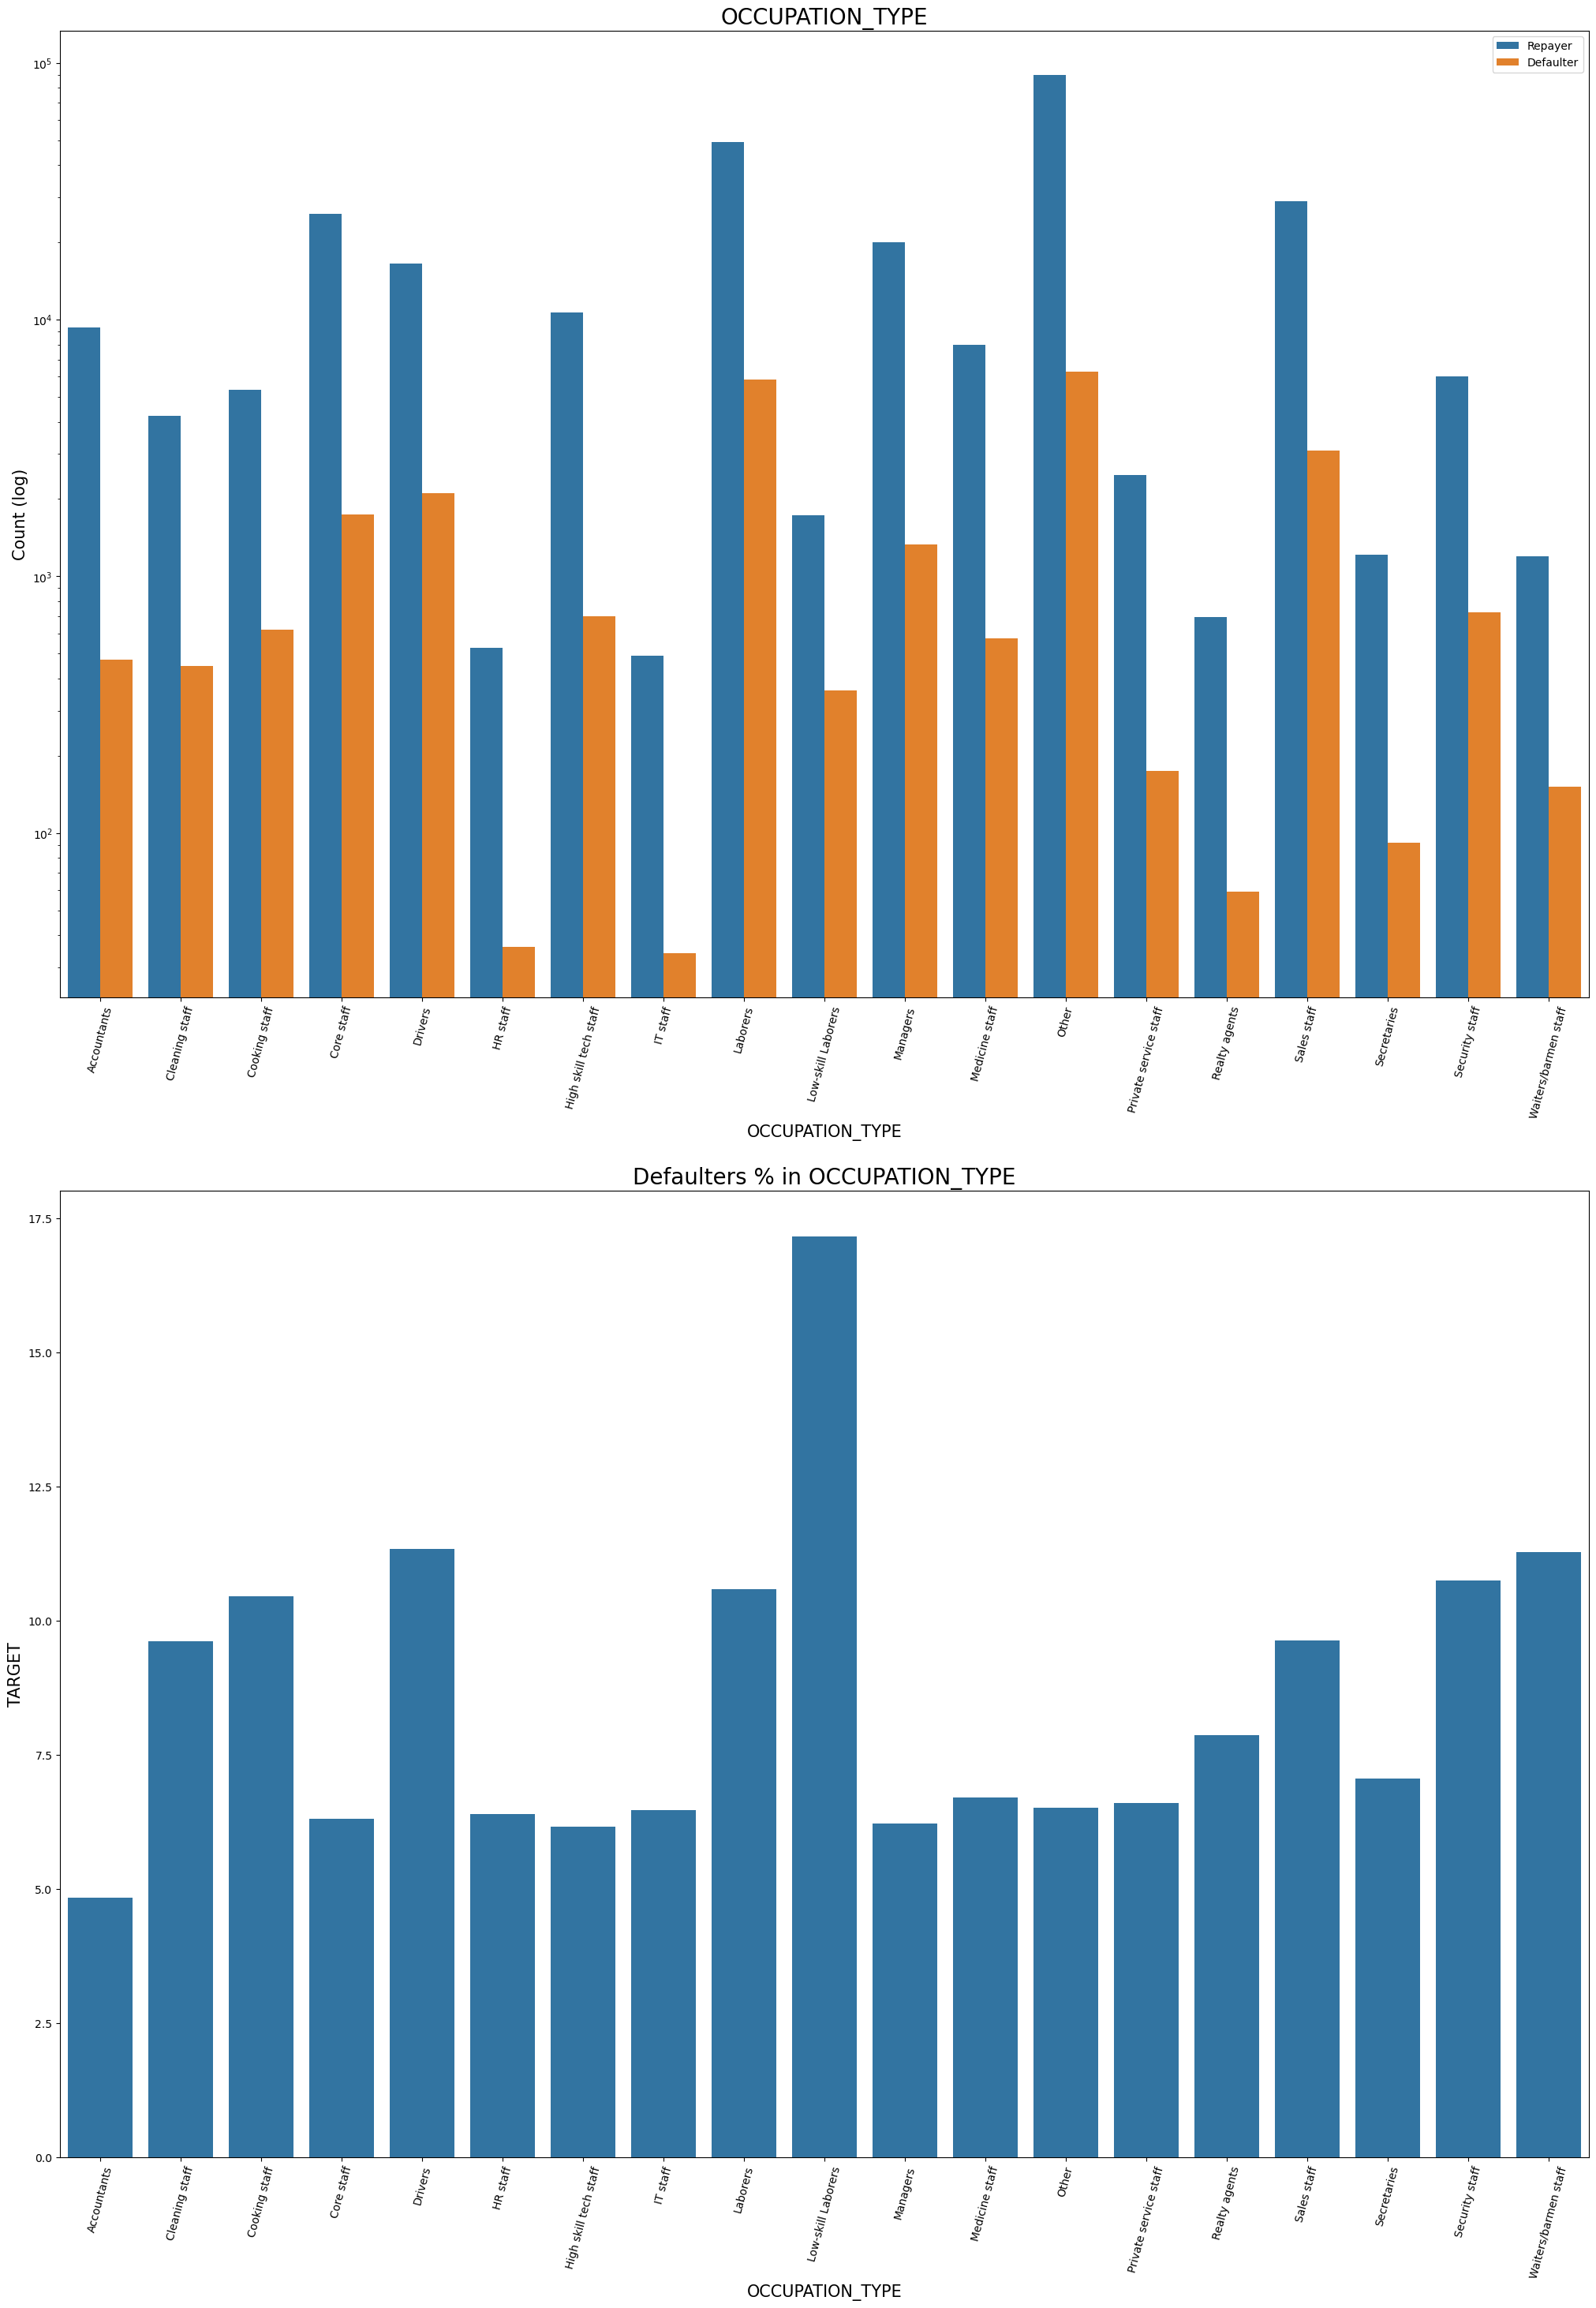

In [112]:
# Occupation Type where applicant lives based on loan repayment 
univariate(appl_df,"OCCUPATION_TYPE","TARGET",True,True,False)

* Inferences:

* Category with highest percent of defaulters are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

* IT staff are less likely to apply for Loan, and most of the loans are taken by Laborers, followed by Sales staff.


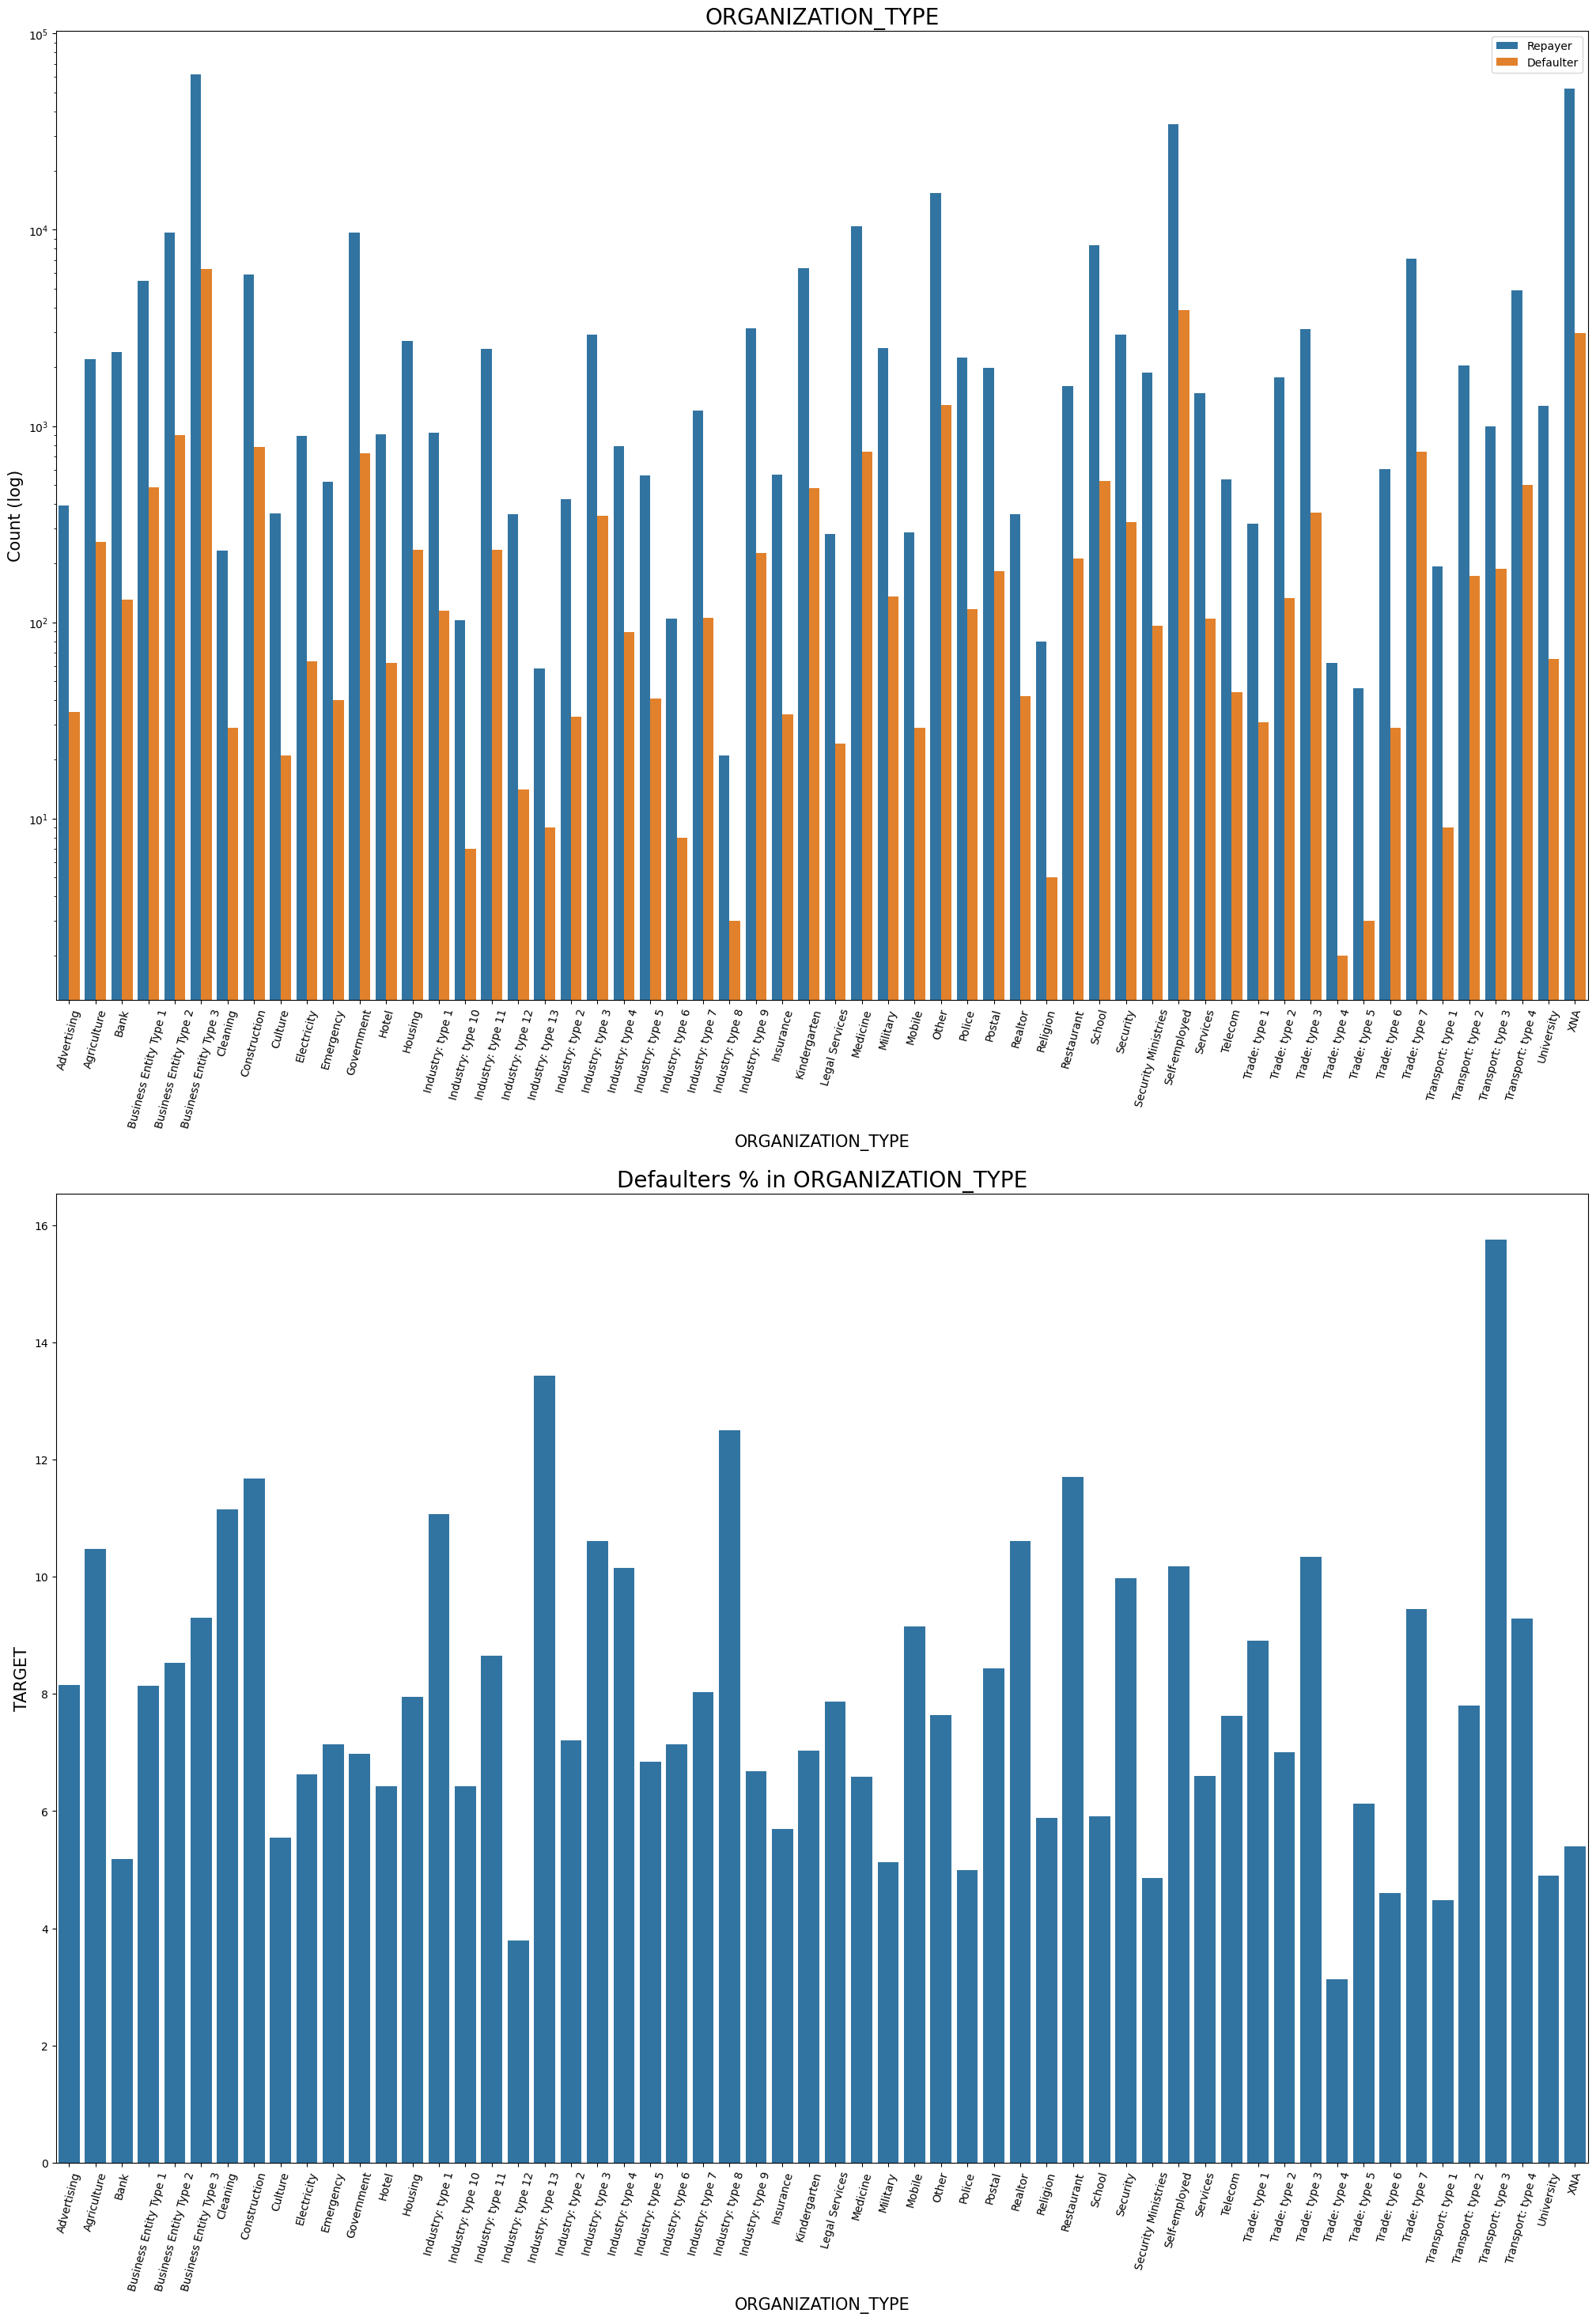

In [113]:
# Loan repayment status based on Organization type
univariate(appl_df,"ORGANIZATION_TYPE","TARGET",True,True,False)

* Inferences: 
* Self employed people have relative high defaulting rate, to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.
* Organizations with highest percent of defaulters are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).

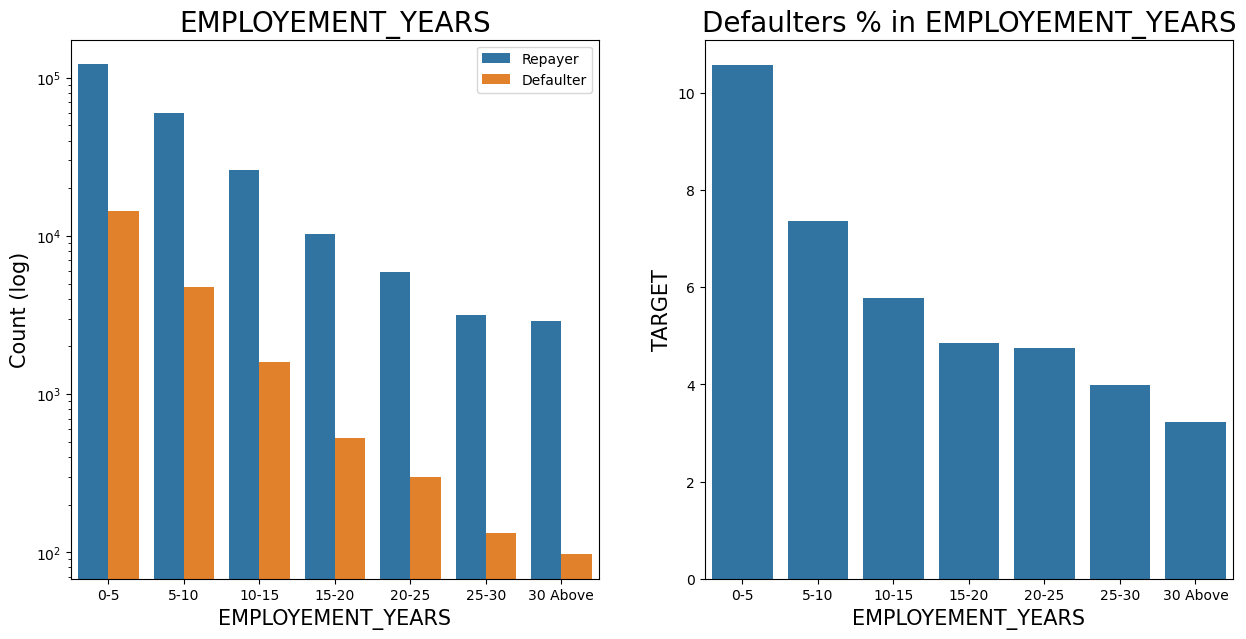

In [114]:
# Employment Year based on loan repayment 
univariate(appl_df,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

* Inferences: 
* With people having 40+ year experience have less than 1% default rate. With increase of employment year, defaulting rate is gradually decreasing.
* Majority of the applicants having working experience between 0-5 years are defaulters. The defaulting rating of this group is also the highest which is around 10%.

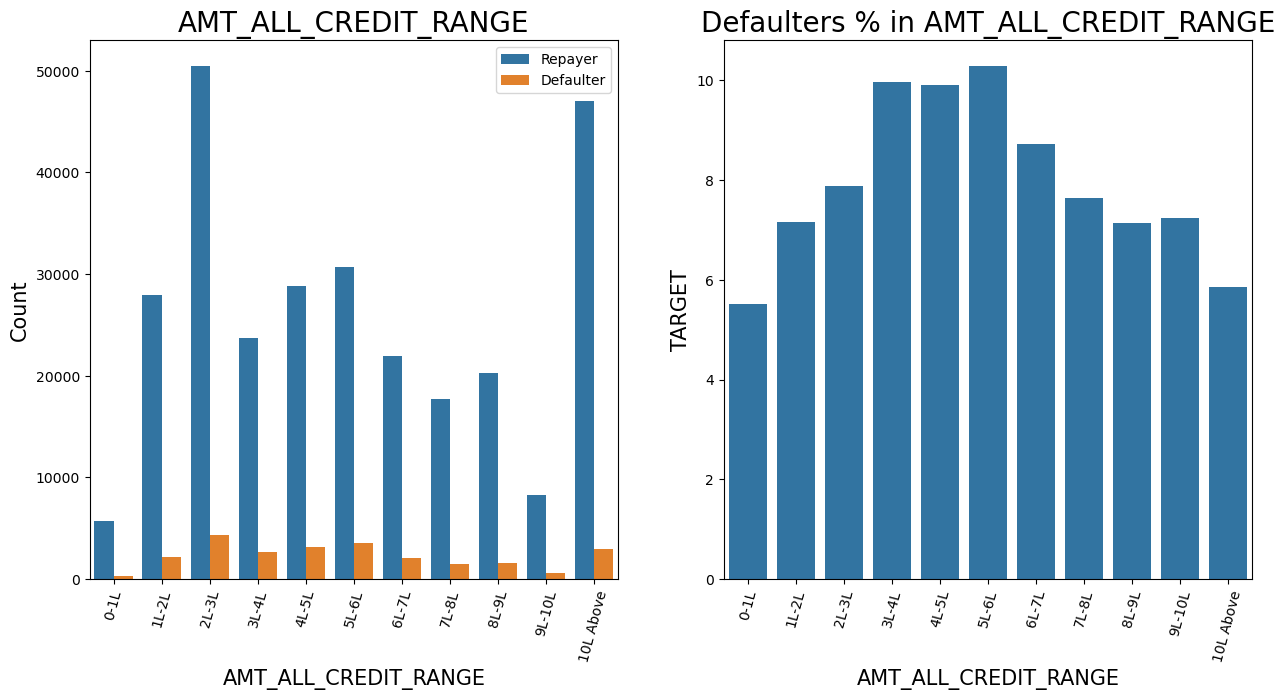

In [115]:
# Amount Credit based on loan repayment 
univariate(appl_df,"AMT_ALL_CREDIT_RANGE","TARGET",False,True,True)

* Inferences: 
* Applicants who get loan for 3L-6L have most number of defaulters than other loan range.
* Applicants with high number have loan in range of 2L-3L.

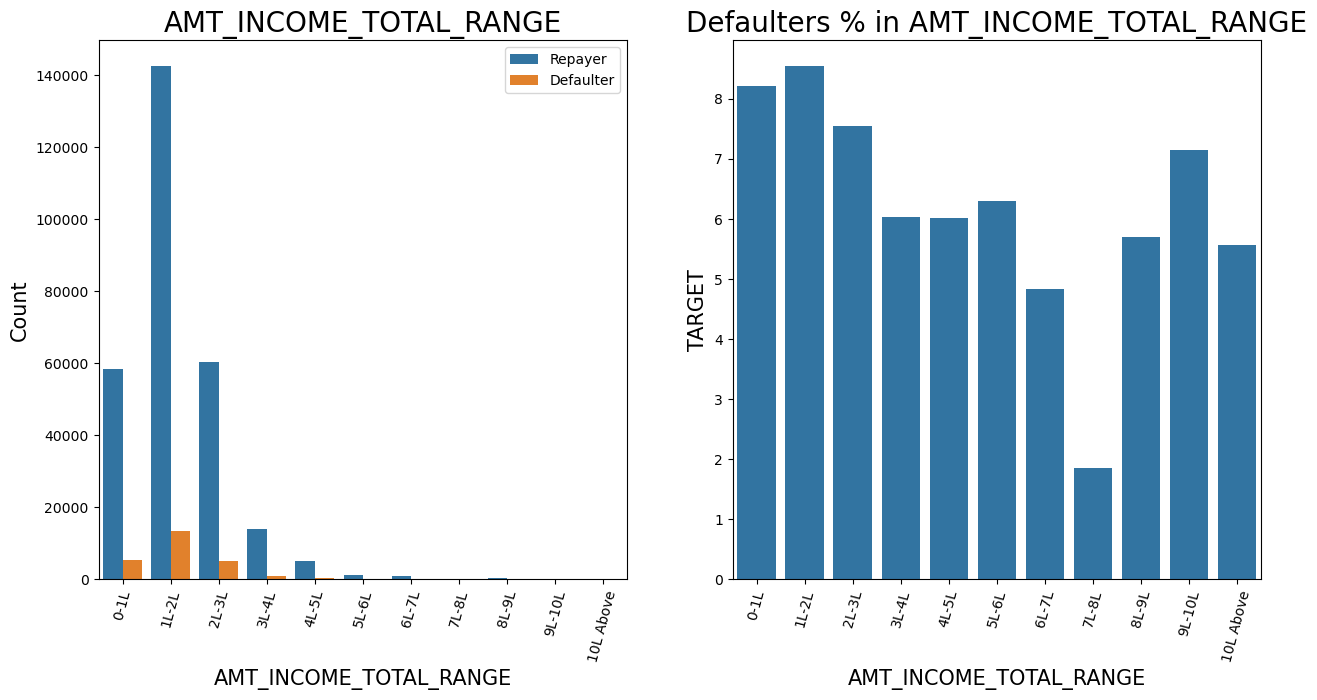

In [116]:
#  Amount Income Range based on loan repayment status
univariate(appl_df,"AMT_INCOME_TOTAL_RANGE","TARGET",False,True,True)

* Inferences: 

* Majority of the applications have Income total less than 3L.
* Application with Income less than 3L, has high probability of defaulting, and applicant with Income 7L-8L are less likely to default.

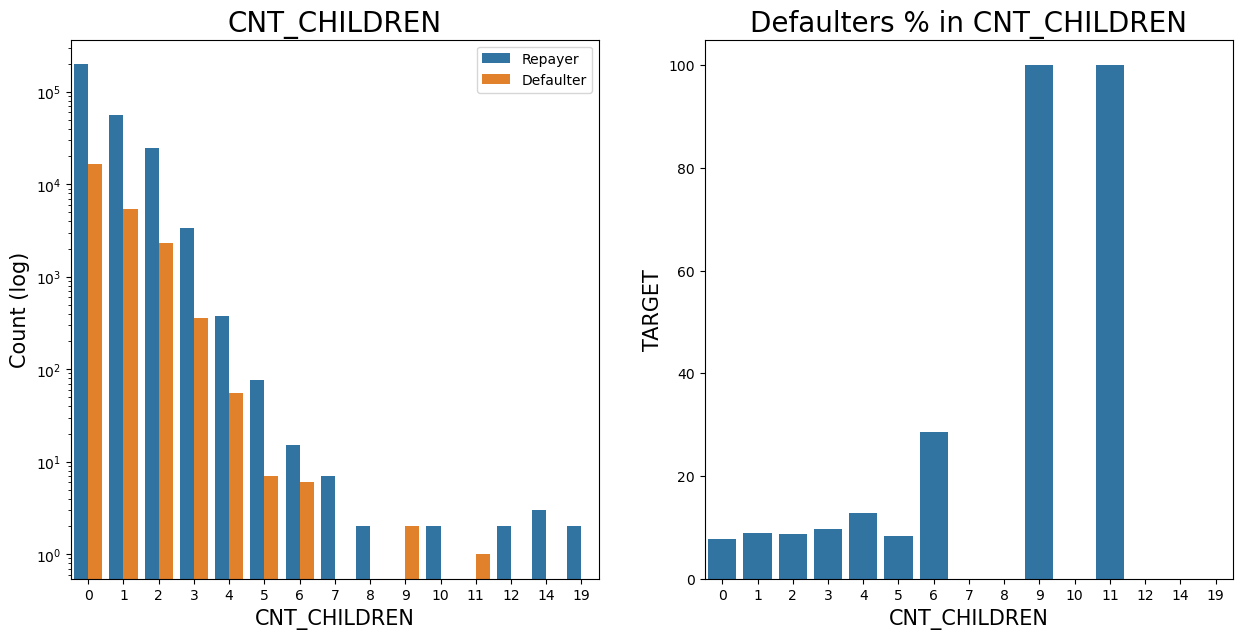

In [117]:
# Number of children based on loan repayment 
univariate(appl_df,"CNT_CHILDREN","TARGET",True,False,True)

* Inferences: 
* Applicants who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate
* Most of the applicants do not have children, and very few clients have more than 3 children.

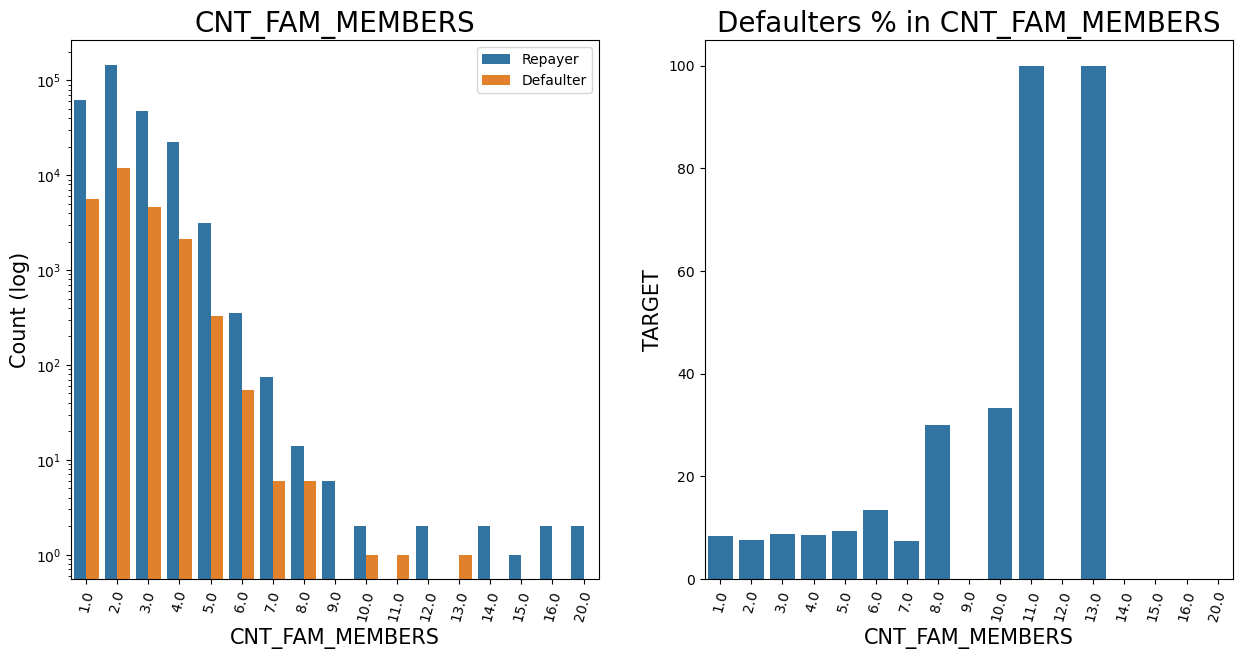

In [118]:
# Number of family members based on loan repayment 
univariate(appl_df,"CNT_FAM_MEMBERS","TARGET",True,True,True)

* Inferences: 
* Family member follows the same trend as children where having more family members increases the risk of defaulting.

============================================================================================

# Categorical Bivariate / Multivariate Analysis

In [119]:
appl_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

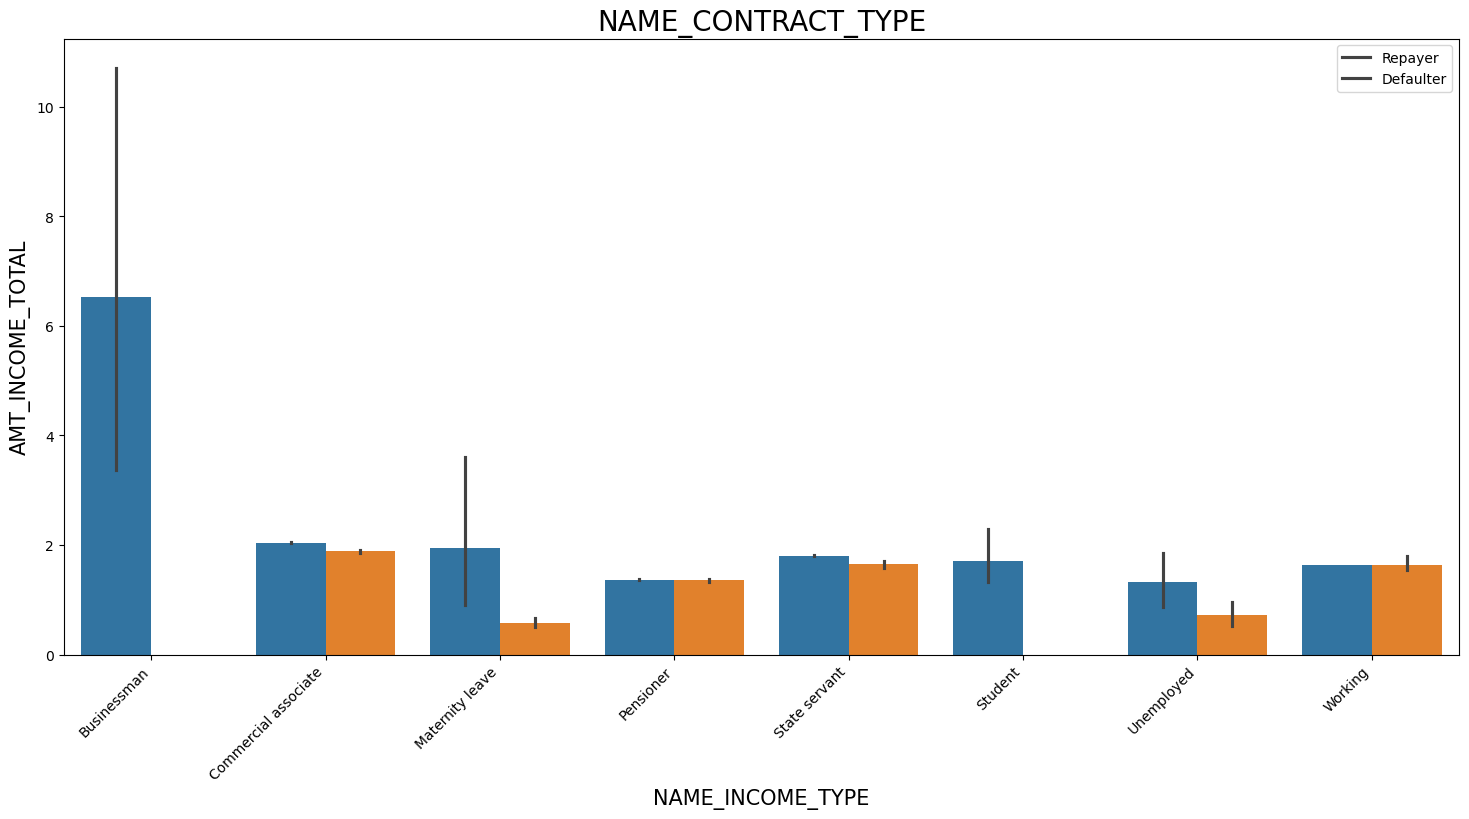

In [120]:
# Seaborn Barplot  for Income type vs Income Amount Range 
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",appl_df,"TARGET",(18,8),['Repayer','Defaulter'])

* Inferences:
* Businessman income is the highest and the estimated range with default 95% confidence level and it seems to indicate that the income of a Businessman could be in the range of slightly close to 4L and slightly more than 10L.

=============================================================================================================
=============================================================================================================

# Now we will Numeric Variables Analysis

### We doing Application data analysis, based on Target values 0 and 1 fro correlation and other analysis.

In [143]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = [ 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = appl_df.loc[appl_df['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = appl_df.loc[appl_df['TARGET']==1, cols_for_correlation]

In [144]:
len(cols_for_correlation)

40

In [146]:
# Getting  top 10 correlation for the Repayers dataframe
mask = np.triu(np.ones(corr_repayer.shape), k=1).astype(bool)

# Unstacking the correlation matrix and filtering with the mask
corr_df_repayer = corr_repayer.where(mask).unstack().dropna().reset_index()
corr_df_repayer.columns = ['VAR1', 'VAR2', 'Correlation']

# Sorting and getting the top 10 correlations
top_10_corr = corr_df_repayer.sort_values(by='Correlation', ascending=False).head(10)
print(top_10_corr)

                 VAR1              VAR2  Correlation
4     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
5     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
2         AMT_ANNUITY        AMT_CREDIT     0.771309
20      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
1         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
3     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
0          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
26  DAYS_REGISTRATION        DAYS_BIRTH     0.333151
34    DAYS_ID_PUBLISH     DAYS_EMPLOYED     0.276663
33    DAYS_ID_PUBLISH        DAYS_BIRTH     0.271314


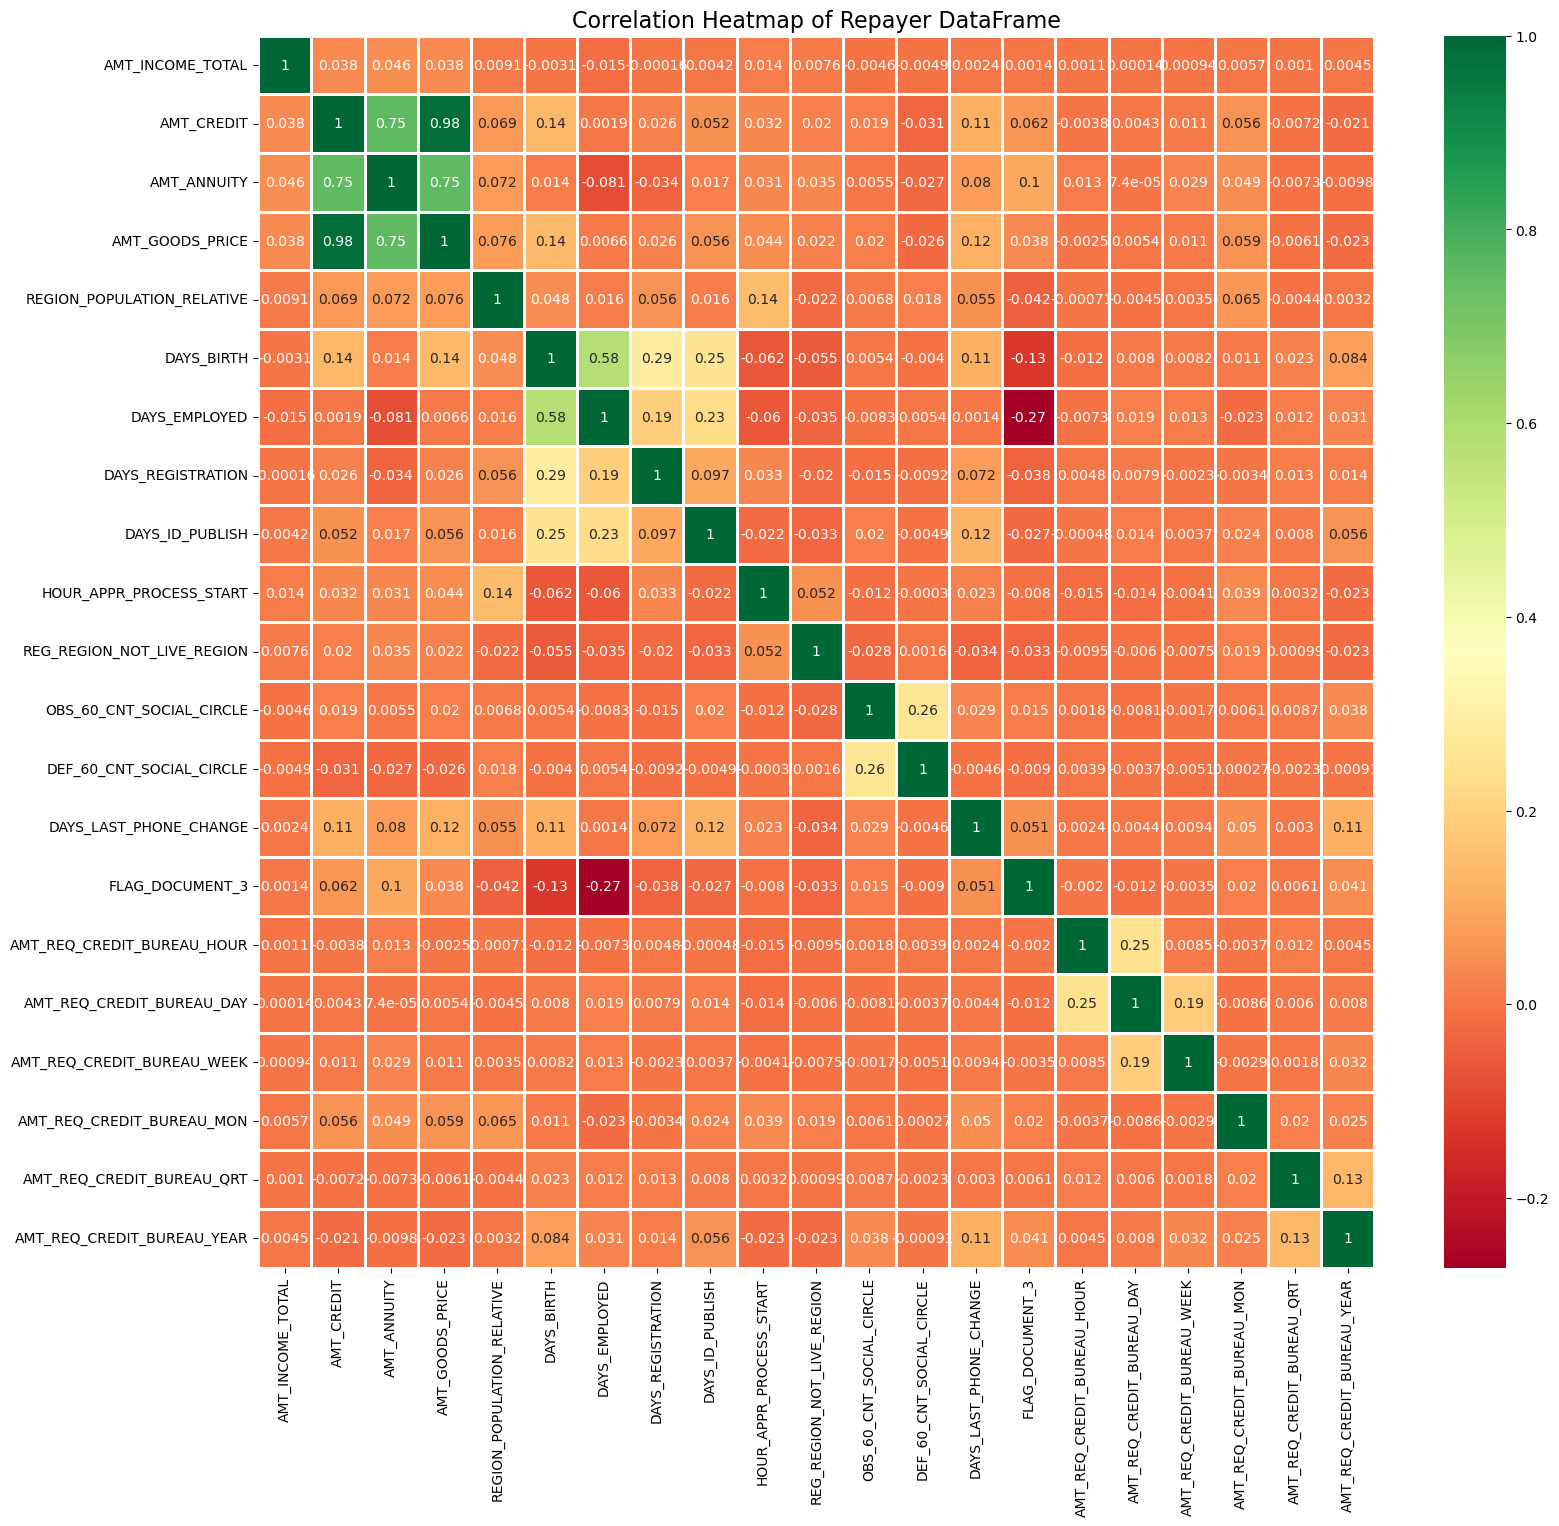

In [165]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(top_10_corr,  cmap="RdYlGn",annot=True,linewidth =1)

# Add title
plt.title('Correlation Heatmap of Repayer DataFrame', fontsize=16)

# Show the heatmap
plt.show()

In [153]:
numeric_df = Defaulter_df.select_dtypes(include=[np.number])
corr_Defaulter = numeric_df.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_Defaulter, dtype=bool))
corr_Defaulter_masked = corr_Defaulter.mask(mask)

# Unstack the correlation matrix and sort the values
corr_df_Defaulter = corr_Defaulter_masked.unstack().reset_index()
corr_df_Defaulter.columns = ['Feature1', 'Feature2', 'Correlation']
corr_df_Defaulter = corr_df_Defaulter.dropna().sort_values(by='Correlation', ascending=False)

# Get the top 10 correlations
top_10_corr = corr_df_Defaulter.head(10)
print(top_10_corr)

                       Feature1                   Feature2  Correlation
24                   AMT_CREDIT            AMT_GOODS_PRICE     0.983103
45                  AMT_ANNUITY            AMT_GOODS_PRICE     0.752699
23                   AMT_CREDIT                AMT_ANNUITY     0.752195
111                  DAYS_BIRTH              DAYS_EMPLOYED     0.582185
112                  DAYS_BIRTH          DAYS_REGISTRATION     0.289114
243    OBS_60_CNT_SOCIAL_CIRCLE   DEF_60_CNT_SOCIAL_CIRCLE     0.264159
113                  DAYS_BIRTH            DAYS_ID_PUBLISH     0.252863
331  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY     0.247511
134               DAYS_EMPLOYED            DAYS_ID_PUBLISH     0.229090
133               DAYS_EMPLOYED          DAYS_REGISTRATION     0.192455


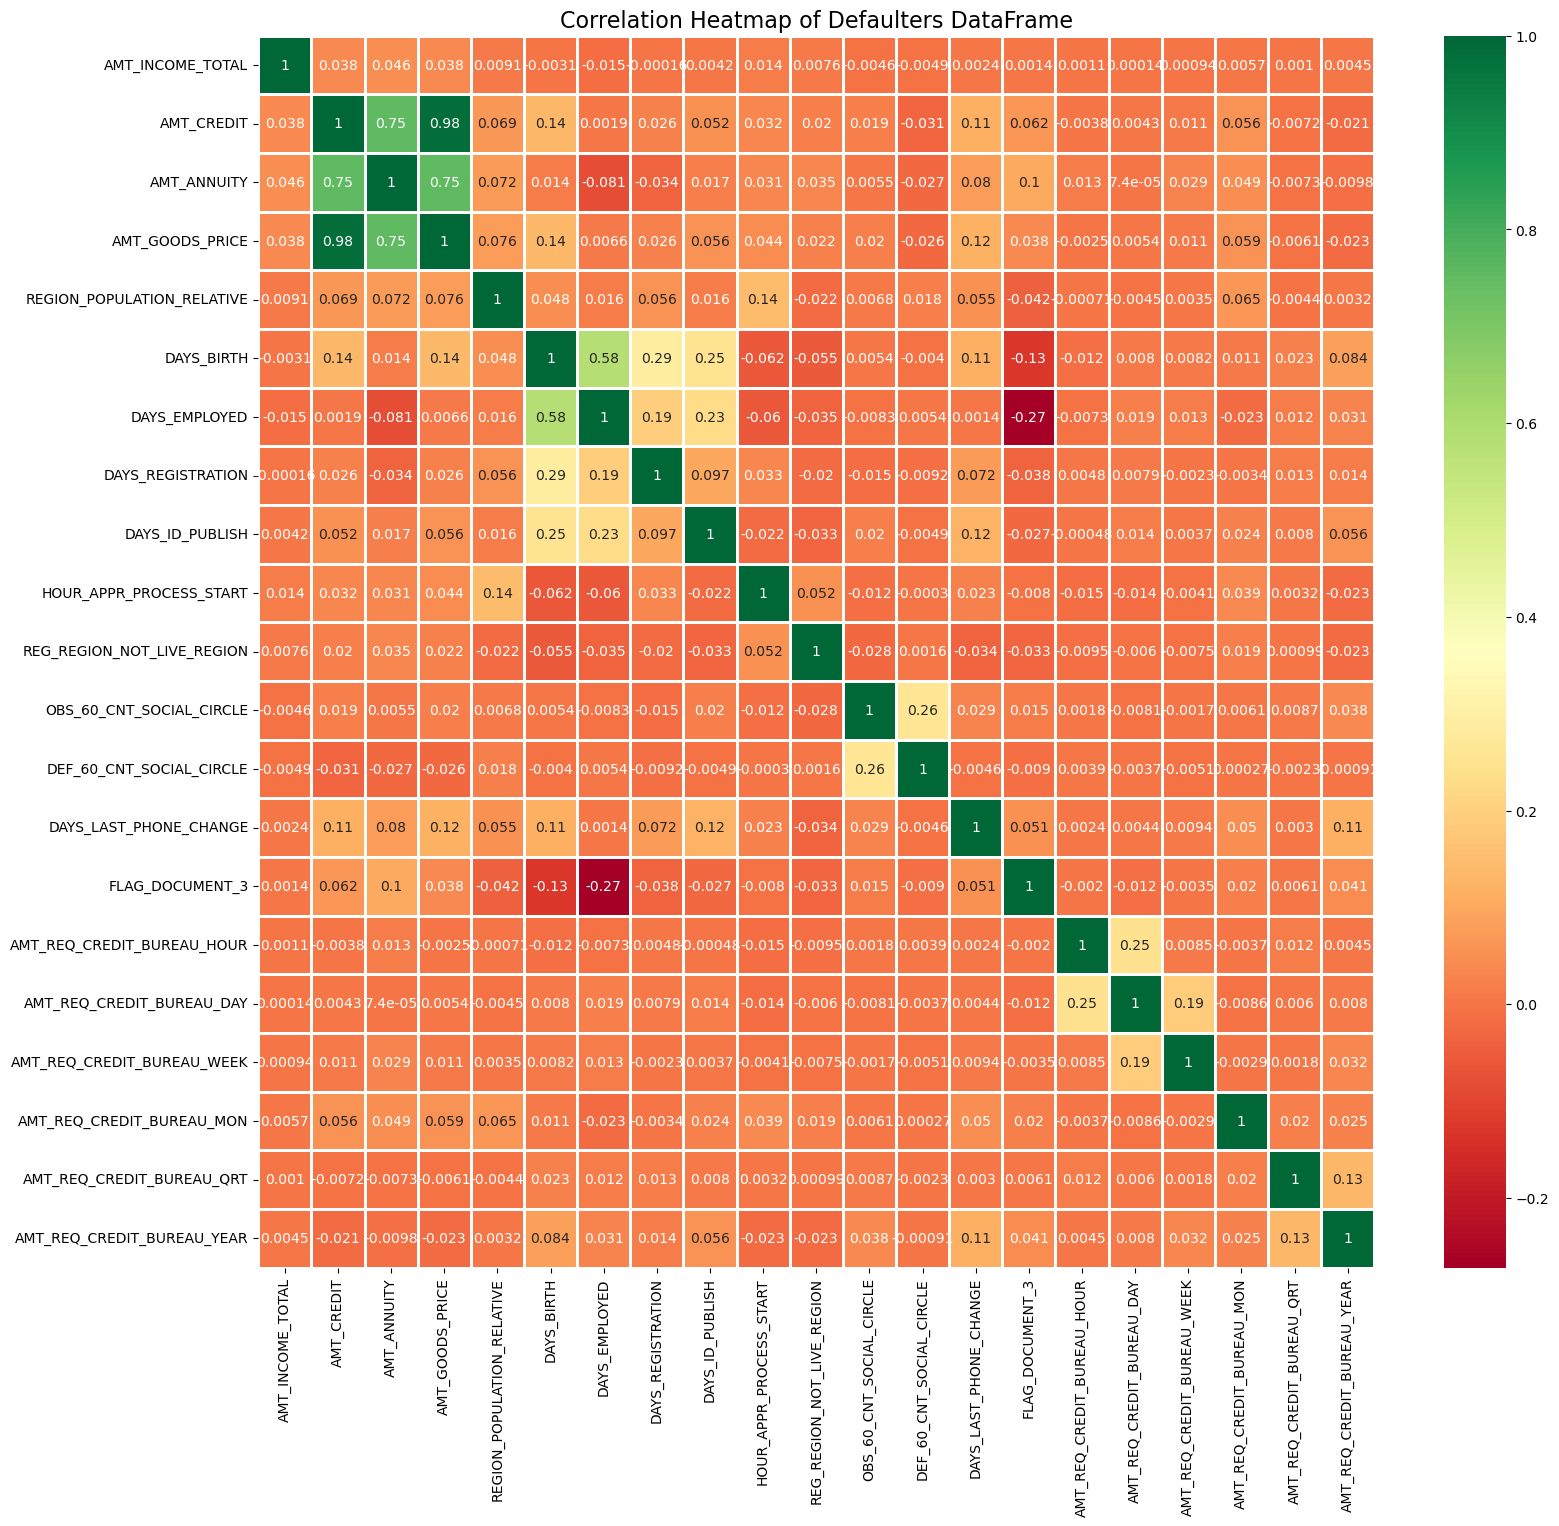

In [164]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(top_10_corr,  cmap="RdYlGn",annot=True,linewidth =1)

# Add title
plt.title('Correlation Heatmap of Defaulters DataFrame', fontsize=16)

# Show the heatmap
plt.show()

### Inferences:  Observation of these 2 heat maps are as below-
1. Credit amount is highly correlated with:
* Goods Price Amount
* Loan Annuity
* Total Income
2. We can also see that Repayers have high correlation in number of days employed.
3. Credit amount is highly correlated with good price amount which is same as Repayers.
4. There is a slight increase in defaulted to observed count in social circle among Defaulters is 0.264) when compared to Repayers is 0.254
5. Days_birth and number of children correlation has reduced to 0.259 in Defaulters when compared to 0.337 in Repayers.
6. Loan annuity correlation with credit amount has slightly reduced in Defaulters is 0.75 when compared to Repayers  is 0.77
7. We can also see that Repayers have high correlation in number of days employed is 0.62 when compared to Defaulters is 0.58.
8 .There is a severe drop in the correlation between total income of the client and the credit amount (0.038) amongst Defaulters whereas it is 0.342 among Repayers.


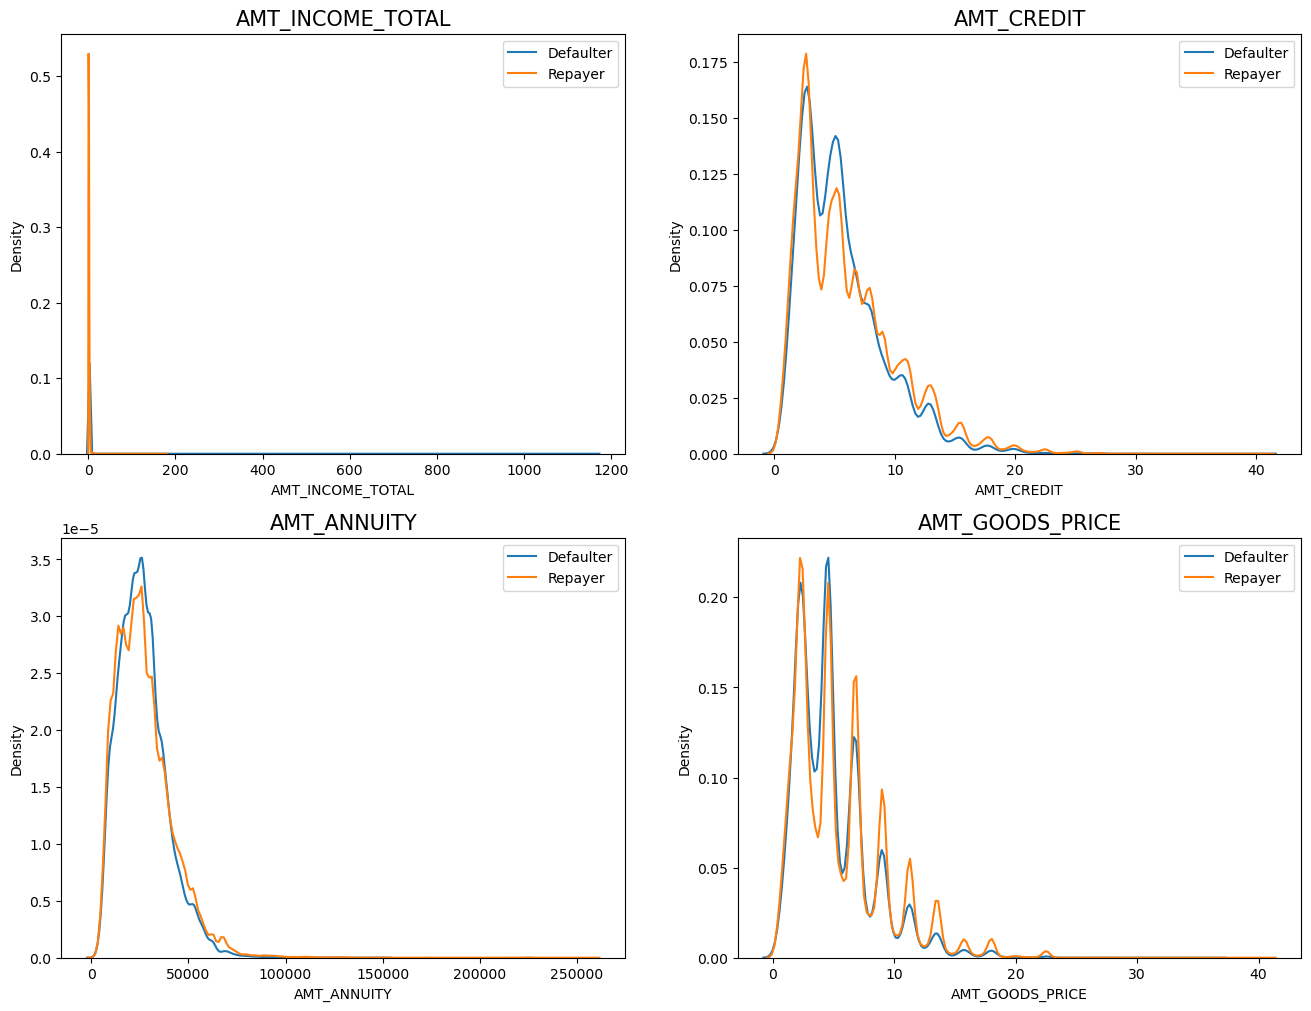

In [156]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = appl_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

### Inferences:
* The Repayers and Defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision.
* Most no of loans are given for goods price below 10L. Credit amount of the loan is mostly less then 10L
* Most people pay annuity below 50K for the credit loan.

### Numerical Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

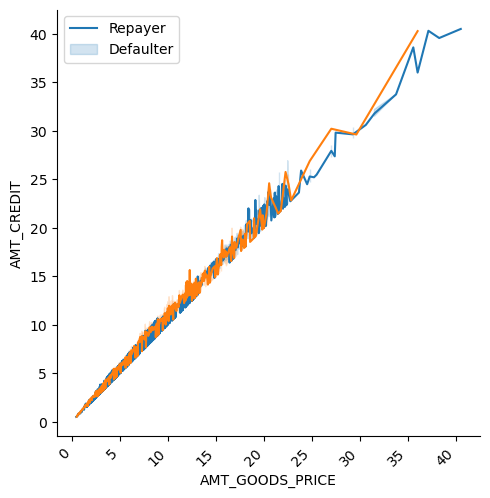

In [166]:
# Goods price and credit and comparing with loan repayment -
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',appl_df,"TARGET", "line",['Repayer','Defaulter'])

In [ ]:
Inferences:
When the credit amount goes beyond 30L, there is an increase in defaulters.

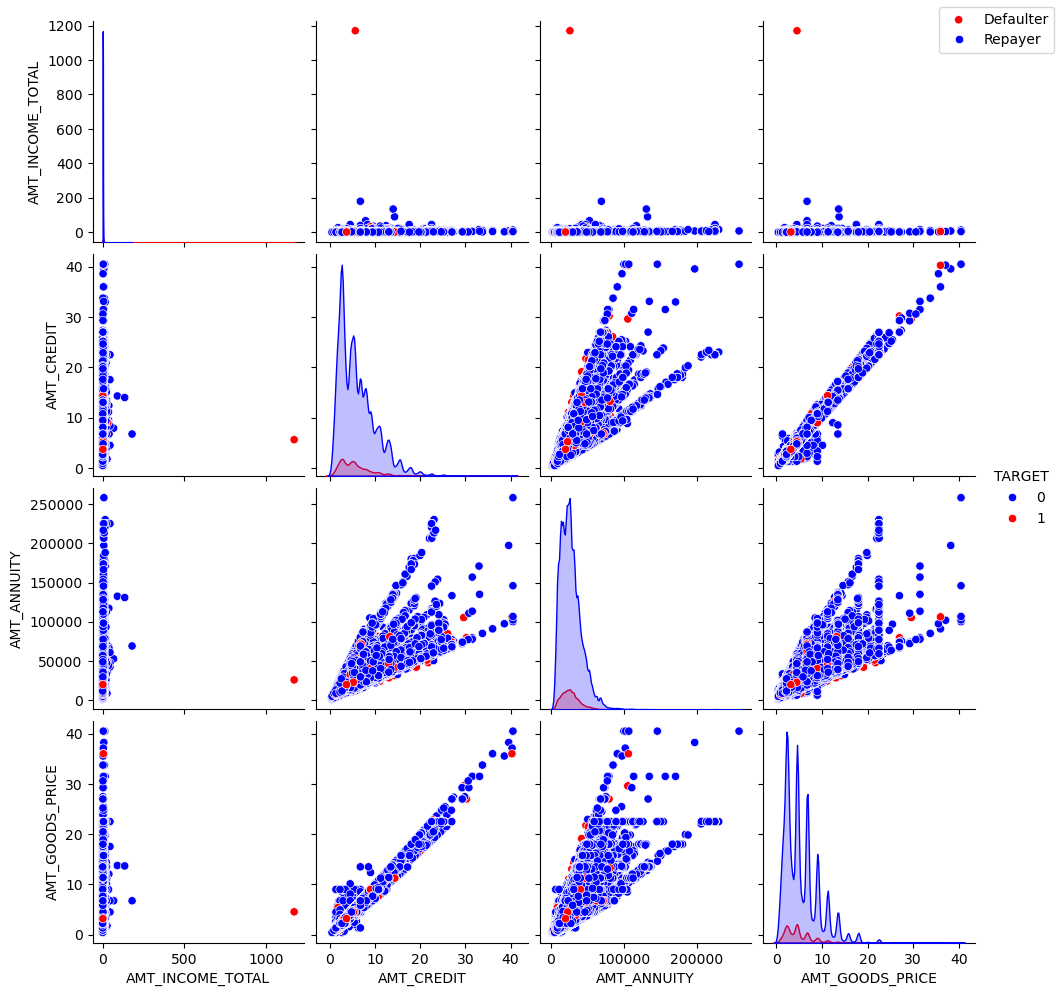

In [169]:
# Plotting pairplots are as below

amount = appl_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

### Inferences:

* When Annuity Amount > 15K and Good Price Amount > 20L, there is a lesser chance of Defaulters, and there are very less Defaulters for AMT_CREDIT >20L
* Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatter plot where most of the data are consolidated in form of a line

==============================================================================================
==============================================================================================

# Now we start Merged Dataframes Analysis

In [170]:
# Below I merging both the dataframe on SK_ID_CURR with Inner Joins
loan_data = pd.merge(appl_df, prev_df, how='inner', on='SK_ID_CURR')
loan_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0            0             2.025      4.065975        24700.5   
1            0             2.700     12.935025        35698.5   
2            0             2.700     12.935025        35698.5   
3            0             2.700     12.935025        35698.5   
4            0             0.675      1.350000         6750.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0              3.510     Unaccompanied          Working   
1             11.295            Family    State servant   
2             11.295            Family    State servant   
3             11.295            Family    State servant   
4              1.350     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0             2120           1        Laborers             1.0   
1              291           1      Core staff             2.0   
2              291           1      Core staff             2.0   
3              291           1      Core staff             2.0   
4             2531           1        Laborers             1.0   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                    2                           2                  WEDNESDAY   
1                    1                           1                     MONDAY   
2                    1                           1                     MONDAY   
3                    1                           1                     MONDAY   
4                    2                           2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

  REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0                      0                      0                       0   
1                      0                      0                       0   
2                      0                      0        

In [171]:
loan_data.shape

(1413701, 82)

In [172]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 82 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_REALTY              1413701 non-null  category
 5   CNT_CHILDREN                 1413701 non-null  category
 6   AMT_INCOME_TOTAL             1413701 non-null  float64 
 7   AMT_CREDIT_x                 1413701 non-null  float64 
 8   AMT_ANNUITY_x                1413608 non-null  float64 
 9   AMT_GOODS_PRICE_x            1412493 non-null  float64 
 10  NAME_TYPE_SUITE_x            1410175 non-null  category
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

### Bisecting the "loan_data" dataframe based on Target value 0 and 1 for correlation and other analysis

In [174]:
L0 = loan_data[loan_data['TARGET']==0] # Repayers
L1 = loan_data[loan_data['TARGET']==1] # Defaulters

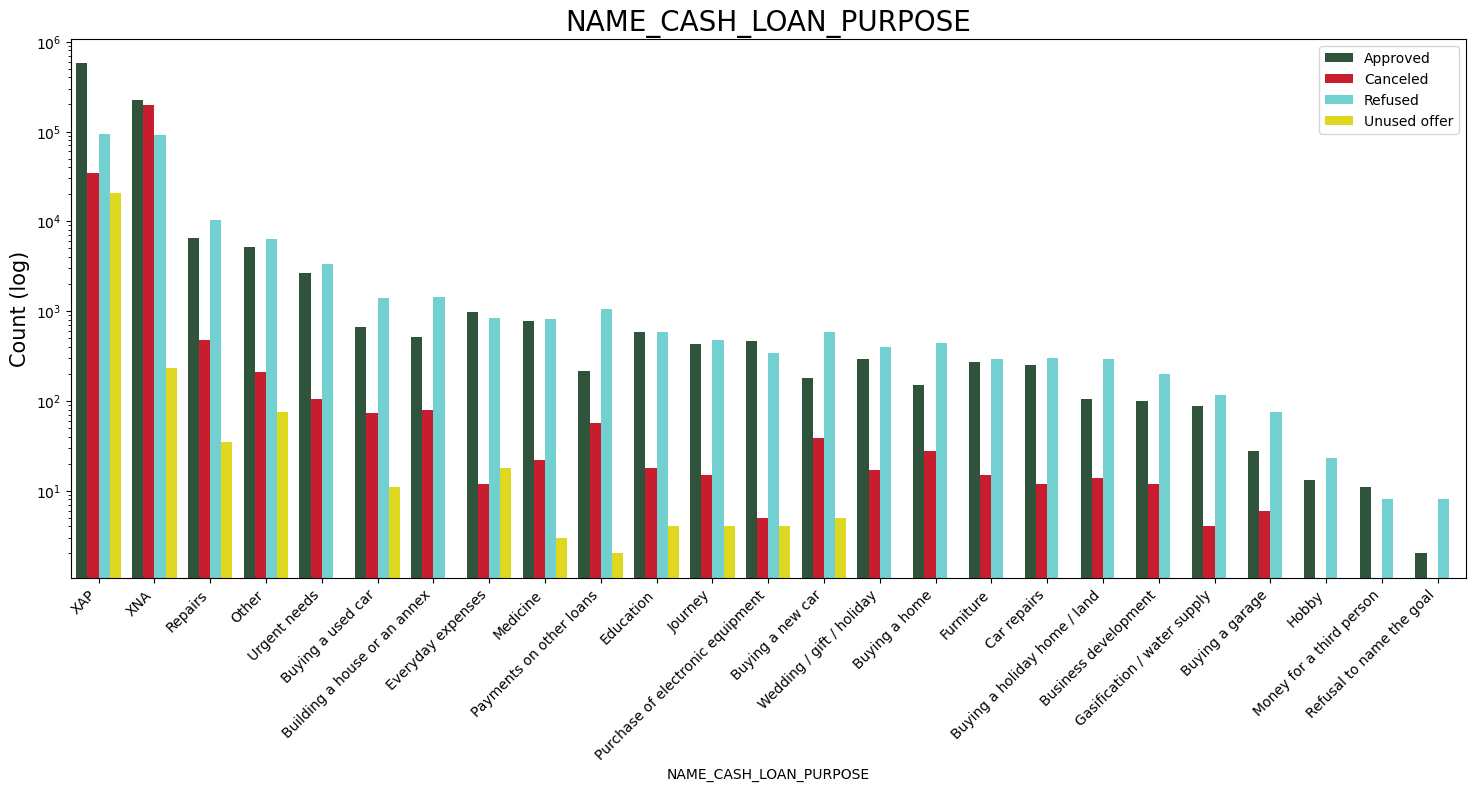

In [175]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

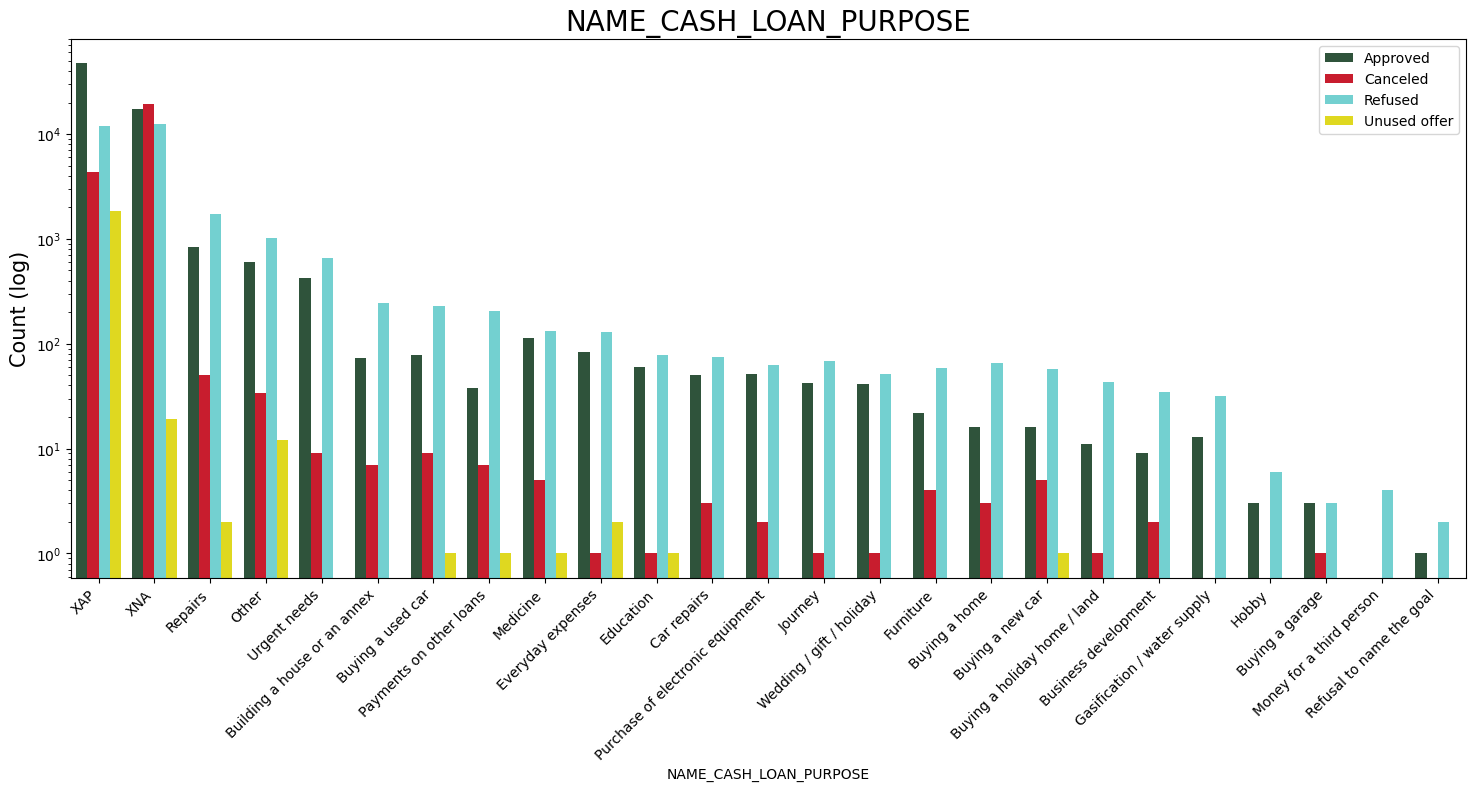

In [176]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

### Inferences:
•	Loan purpose has high number of unknown values (XAP, XNA)
•	Loan taken for the purpose of Repairs looks to have highest default rate
•	Huge number application have been rejected by bank or refused by applicant who is applied for Repair or Other. 
•	From this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.


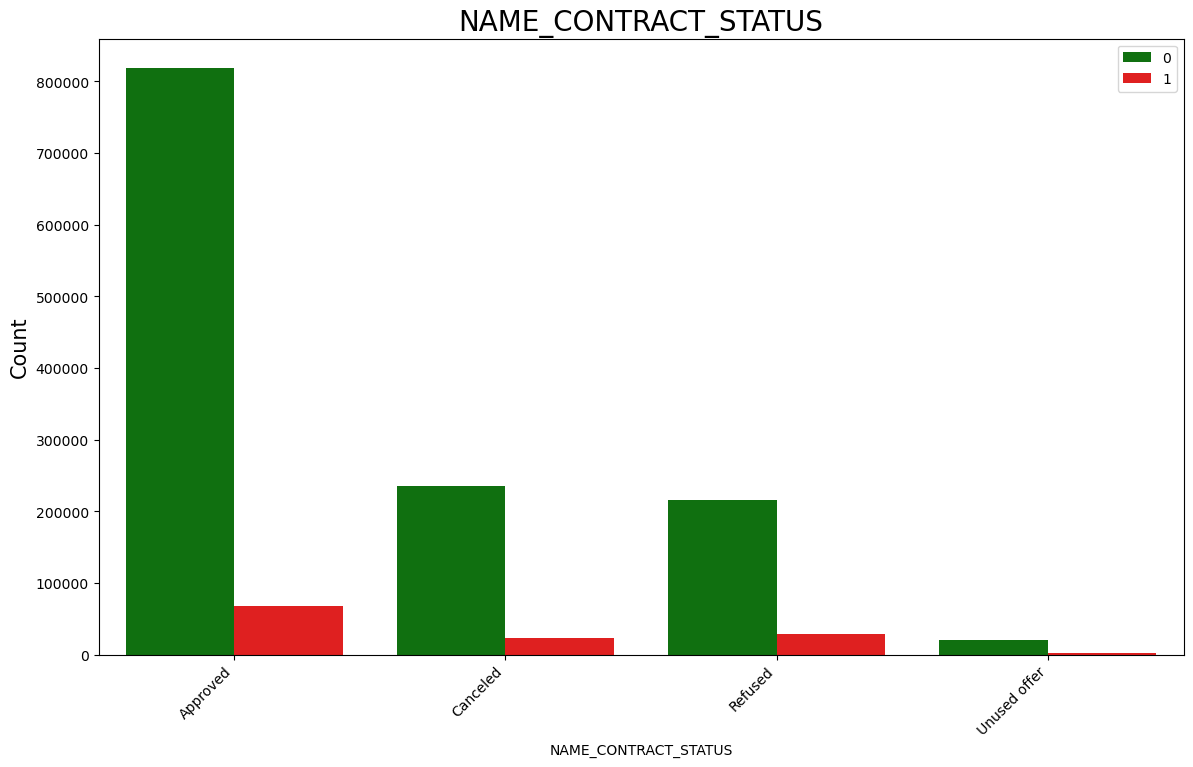

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [179]:
univariate_c_merged("NAME_CONTRACT_STATUS",loan_data,"TARGET",['g','r'],False,(14,8))
r = loan_data.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

### Inferences:
* Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.
* 90% of the previously cancelled applicants have actually Repayed the loan. Revising the interest rates would increase business opportunity for these clients
* 88% of the clients who have been previously refused a loan has payed back the loan in current case.


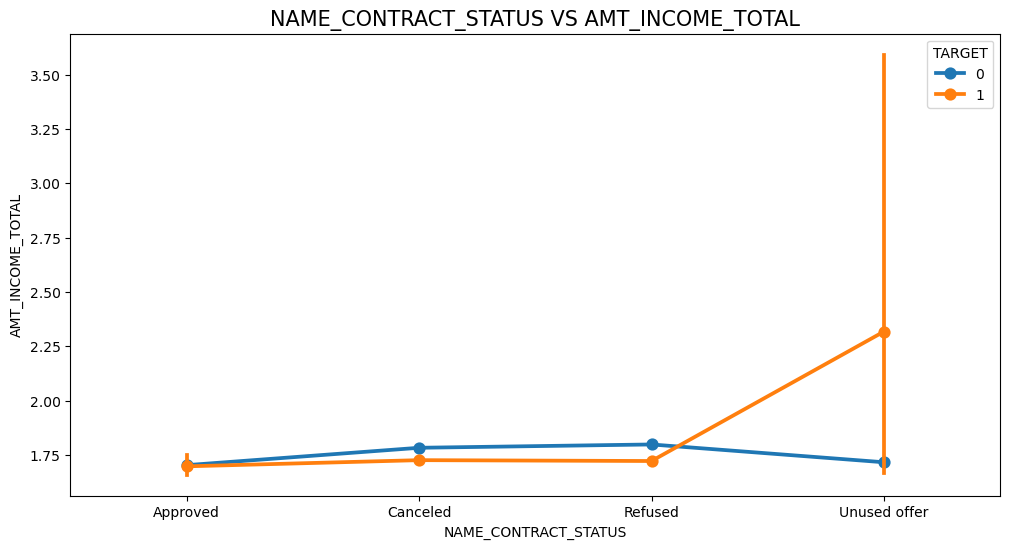

In [181]:
# plotting some other graphs for analysis -

pointplot(loan_data,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

### Inferences:

* The point plot show that the applicants who have not used offer earlier have defaulted even when there average income is higher than others


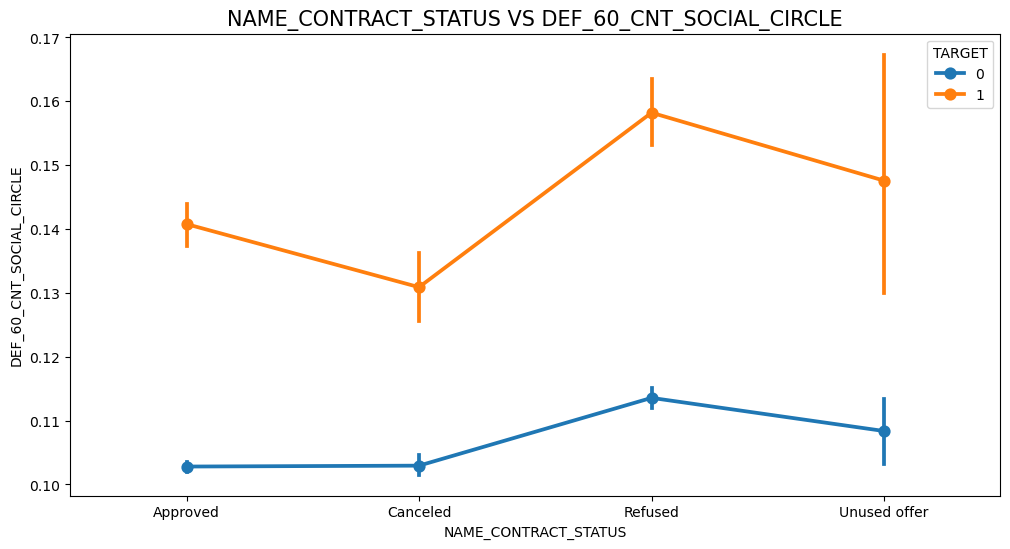

In [182]:
pointplot(loan_data,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

### Inferences:

* Applicants who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursement of the loan.


=========================================================================================================

# ============= Conclusions of above analysis============

## Decisive Factor whether an applicant will be Defaulter:

•	REGION_RATING_APPLICANTS: Applicants who live in Rating 3 has highest defaults.

•	CNT_CHILDREN & CNT_FAM_MEMBERS: Applicants who have children => 9 default 100% and so their applications are to be rejected.

•	AMT_GOODS_PRICE: When the credit amount goes beyond 3L, there is an increase in defaulters.

•	OCCUPATION_TYPE: Due to default rate is huge avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

•	CODE_GENDER: Females are good repayer where as men are at relatively higher default rate.

•	NAME_FAMILY_STATUS : Civil marriage or who are single applicants who have default a lot.

•	NAME_EDUCATION_TYPE: Lower Secondary & Secondary education applicants are default a lot.

•	NAME_INCOME_TYPE: Maternity leave OR Unemployed applicants are default a lot.

•	ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed applicants have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to might be the risk of defaulting.

•	DAYS_BIRTH: Avoid young applicants who are in age group of 20-40 as they have higher probability of defaulting


•	DAYS_EMPLOYED: Applicants who have less than 5 years of employment have high default rate.

--------------------------------------------------------------------------------------------------

## Decisive Factor whether an applicant will be Repayer:

•	CNT_CHILDREN: Applicants with 0 to 2 children tend to repay the loans. 

•	DAYS_BIRTH: If age above of 50 have low probability of defaulting

•	DAYS_EMPLOYED: 40+ year experience having less than 1% default rate

•	AMT_INCOME_TOTAL: Income more than 700,000 are less likely to default

•	NAME_EDUCATION_TYPE: Academic degree has fewer defaults.

•	NAME_INCOME_TYPE: Student and Businessmen have no defaults.

•	REGION_RATING_APPLICANTS: RATING 1 is safer.

•	ORGANIZATION_TYPE: Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%

•	NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.

------------------------------------------------------------------------------------------------------------------

## Below are few conditions where interest rate is high might getting any default risk leading to business loss:

•	CNT_CHILDREN & CNT_FAM_MEMBERS: higher interest should be imposed on their loans., who have 4 to 8 children has a very high default rate.

•	AMT_INCOME: Those applicants could be offered loan with higher interest compared to other income category, since 90% of the applications have Income total less than 3 and they have high probability of defaulting

•	NAME_HOUSING_TYPE:  Offering the loan would might the loss if any of applicants are from the category of people who live in rented apartments & living with parents.

•	AMT_CREDIT: Having higher interest specifically for Applicants who get loan for 3L - 6L credit range would be ideal because they tend to default more than others.

•	,NAME_CASH_LOAN_PURPOSE: Repairs purpose seems to have highest default rate. Very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either bank offers very high loan interest rate which they are rejected.

--------------------------------------------------------------------------------------------------------------------------

Business Advices after this EDA as below:¶

•	88% of the applicants who were refused by bank for loan earlier have now turned into a repaying applicants. Hence documenting the reason for rejection could moderate the business loss and these clients could be contacted for further loans.	
•	90% of the previously cancelled applicants have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.


# -------------------------Thank You------------------------------------

                                              ### CREDIT EDA BY GAYATRI BHINGE ###